# Purpose
This notebook describes the typical activities carried out  at the beginning to a project / thread when customer shares new data. We will be trying to understand the tables, columns and information flow. Typically we also look for data issues and confirm with respective owners for resolution. At the end of this activity, the data sources and their treatment is finalized. Code in this notebook will not be part of the production code.

This data can be downloaded from
[here](https://drive.google.com/file/d/11DqcBxxEcn3QA4YvPQmmExBm-m6AgUQ_/view?usp=sharing)

**NOTE**:
Download the data from the above link, and copy the extracted csv files to the path `data/raw/sales/` (relative to root of the code archive folder). Make sure to copy the files before continuing on with the rest of the notebook.

# Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%%time
%matplotlib inline
# Add NumPy compatibility patch
import numpy as np

# Third-party imports
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as ge
# Project imports
from ta_lib.core.api import display_as_tabs, initialize_environment
# Initialization
initialize_environment(debug=False, hide_warnings=True)

CPU times: user 17.5 ms, sys: 3.51 ms, total: 21 ms
Wall time: 28.8 ms


In [4]:
from ta_lib.core.api import create_context, list_datasets, load_dataset

In [5]:
# Load configuration and create context
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)

In [6]:
print("Available datasets:")
list_datasets(context)

Available datasets:


['/raw/theme_list',
 '/raw/theme_product_list',
 '/raw/product_manufacturer_list',
 '/raw/google_search_data',
 '/raw/sales_data',
 '/raw/social_media_data',
 '/cleaned/theme_list',
 '/cleaned/theme_product_list',
 '/cleaned/product_manufacturer_list',
 '/cleaned/google_search_data',
 '/cleaned/sales_data',
 '/cleaned/social_media_data',
 '/cleaned/combined_data',
 '/processed/combined_data',
 '/train/analytics/features',
 '/train/analytics/target',
 '/test/analytics/features',
 '/test/analytics/target',
 '/score/analytics/output']

## Data

### Background

Customer is a distributor of electronic devices. They partner with manufacturers, carriers and refurbishers and sell across to  retailers. The selling price is the outcome of negotiation between sales representatives and retailers. Customer wants to understand the selling price variation and determine  optimal pricing with Machine Learning.

In [7]:
# Load all raw datasets
theme_list_df = load_dataset(context, 'raw/theme_list')
theme_product_df = load_dataset(context, 'raw/theme_product_list')
manufacturer_df = load_dataset(context, 'raw/product_manufacturer_list')
google_search_df = load_dataset(context, 'raw/google_search_data')
sales_df = load_dataset(context, 'raw/sales_data')
social_media_df = load_dataset(context, 'raw/social_media_data')

/home/alisaz/case_study/case-study/src/../data/raw/Theme_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/Theme_product_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/product_manufacturer_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/google_search_data.csv
/home/alisaz/case_study/case-study/src/../data/raw/sales_data.csv
/home/alisaz/case_study/case-study/src/../data/raw/social_media_data.csv


In [8]:
# Save the cleaned dataframes for the next notebook

# Clean column names
for df_name in ['theme_list_df', 'theme_product_df', 'google_search_df', 
                'social_media_df', 'manufacturer_df', 'sales_df']:
    if df_name in locals():
        df = locals()[df_name]
        df.columns = df.columns.str.lower()

In [33]:
# Basic dataset info
print("\n----- Theme List Dataset -----")
print(f"Shape: {theme_list_df.shape}")
print(theme_list_df.head())
print(theme_list_df.info())
print(theme_list_df.describe())


----- Theme List Dataset -----
Shape: (208, 2)
   claim_id claim name
0         0   No Claim
1         8   low carb
2        15      beans
3        16      cocoa
4        26    vanilla
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   claim_id    208 non-null    int64 
 1   claim name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB
None
         claim_id
count  208.000000
mean   585.379808
std    306.710307
min      0.000000
25%    272.250000
50%    633.000000
75%    861.750000
max    999.000000


In [34]:
print("\n----- Theme-Product Dataset -----")
print(f"Shape: {theme_product_df.shape}")
print(theme_product_df.head())
print(theme_product_df.info())
print(theme_product_df.describe())


----- Theme-Product Dataset -----
Shape: (91485, 2)
   product_id  claim_id
0          26         8
1          29         8
2          48        81
3          50        81
4          74       227
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  91485 non-null  int64
 1   claim_id    91485 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None
         product_id      claim_id
count  91485.000000  91485.000000
mean   26592.860983     86.830847
std    15793.924430    130.570486
min        1.000000      0.000000
25%    12908.000000      0.000000
50%    26074.000000      8.000000
75%    39238.000000    158.000000
max    57317.000000    438.000000


In [36]:
print("\n----- Manufacturer Dataset -----")
print(f"Shape: {manufacturer_df.shape}")
print(manufacturer_df.head(2))
print(manufacturer_df.info())
print(manufacturer_df.describe())


----- Manufacturer Dataset -----
Shape: (67175, 7)
   product_id  vendor  unnamed: 2  unnamed: 3  unnamed: 4  unnamed: 5  \
0           1  Others         NaN         NaN         NaN         NaN   
1           2  Others         NaN         NaN         NaN         NaN   

   unnamed: 6  
0         NaN  
1         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  67175 non-null  int64  
 1   vendor      67175 non-null  object 
 2   unnamed: 2  0 non-null      float64
 3   unnamed: 3  0 non-null      float64
 4   unnamed: 4  0 non-null      float64
 5   unnamed: 5  0 non-null      float64
 6   unnamed: 6  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ MB
None
         product_id  unnamed: 2  unnamed: 3  unnamed: 4  unnamed: 5  \
count  67175.000000         0.0         0.0         0.0         0

In [37]:
print("\n----- Google Search Dataset -----")
print(f"Shape: {google_search_df.shape}")
print(google_search_df.head())
print(google_search_df.info())
print(google_search_df.describe())


----- Google Search Dataset -----
Shape: (181565, 6)
         date platform  searchvolume  claim_id  week_number  year_new
0  05-01-2014   google           349       916            1      2014
1  06-01-2014   google           349       916            2      2014
2  07-01-2014   google           697       916            2      2014
3  10-01-2014   google           349       916            2      2014
4  20-01-2014   google           697       916            4      2014
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchvolume  181565 non-null  int64 
 3   claim_id      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB
None
        searchvol

In [38]:
print("\n----- Sales Dataset -----")
print(f"Shape: {sales_df.shape}")
print(sales_df.head())
print(sales_df.info())
print(sales_df.describe())


----- Sales Dataset -----
Shape: (4526182, 5)
   system_calendar_key_n  product_id  sales_dollars_value  sales_units_value  \
0               20160109           1              13927.0                934   
1               20160109           3              10289.0               1592   
2               20160109           4                357.0                 22   
3               20160109           6              23113.0               2027   
4               20160109           7              23177.0               3231   

   sales_lbs_value  
0            18680  
1            28646  
2              440  
3            81088  
4            58164  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526182 entries, 0 to 4526181
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   system_calendar_key_n  int64  
 1   product_id             int64  
 2   sales_dollars_value    float64
 3   sales_units_value      int64  
 4   sales_lbs_val

In [39]:
print("\n----- Social Media Dataset -----")
print(f"Shape: {social_media_df.shape}")
print(social_media_df.head())
print(social_media_df.info())
print(social_media_df.describe())



----- Social Media Dataset -----
Shape: (533390, 3)
   theme id       published_date  total_post
0     148.0  2015-01-10 00:00:00          76
1     148.0  2015-10-10 00:00:00          31
2     148.0  2015-11-10 00:00:00          65
3     148.0  2015-12-10 00:00:00          88
4     148.0           10/13/2015          85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   theme id        314879 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ MB
None
            theme id     total_post
count  314879.000000  533390.000000
mean      618.714049    1054.344890
std       290.145829    4459.377626
min         8.000000       0.000000
25%       440.000000       3.000000
50%       677.000000      35.000000
75%       870.000

No missing values in Theme List
No missing values in Theme-Product
Missing values in Manufacturer:
unnamed: 2    67175
unnamed: 3    67175
unnamed: 4    67175
unnamed: 5    67175
unnamed: 6    67175
dtype: int64


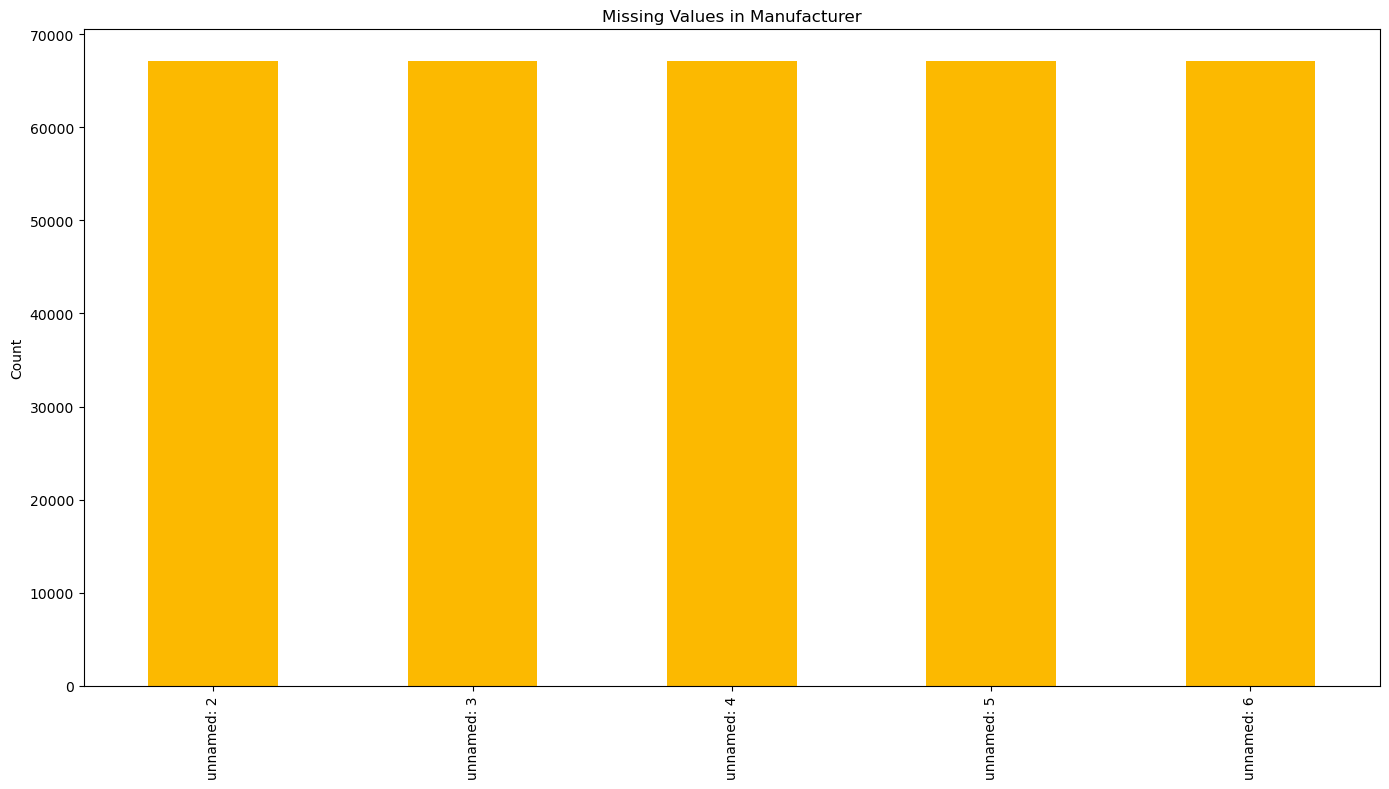

No missing values in Google Search
No missing values in Sales
Missing values in Social Media:
theme id    218511
dtype: int64


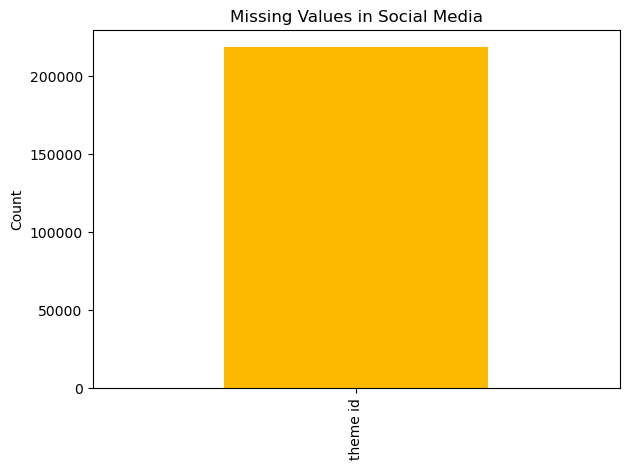

In [41]:
# Exploratory visualizations

# Check for missing values
def plot_missing_values(dataframes, names):
    plt.figure(figsize=(14, 8))
    for i, df in enumerate(dataframes):
        missing = df.isnull().sum()
        missing = missing[missing > 0]
        if missing.empty:
            print(f"No missing values in {names[i]}")
        else:
            print(f"Missing values in {names[i]}:")
            print(missing)
            missing.plot.bar(title=f'Missing Values in {names[i]}', color='#fcb900')
            plt.ylabel('Count')
            plt.tight_layout()
            plt.show()

dataframes = [theme_list_df, theme_product_df, manufacturer_df, 
              google_search_df, sales_df, social_media_df]
names = ['Theme List', 'Theme-Product', 'Manufacturer', 
         'Google Search', 'Sales', 'Social Media']

plot_missing_values(dataframes, names)

In [42]:
# Check for duplicates
for i, df in enumerate(dataframes):
    dup_count = df.duplicated().sum()
    print(f"Duplicates in {names[i]}: {dup_count}")

Duplicates in Theme List: 0
Duplicates in Theme-Product: 0
Duplicates in Manufacturer: 0
Duplicates in Google Search: 40
Duplicates in Sales: 0
Duplicates in Social Media: 26299


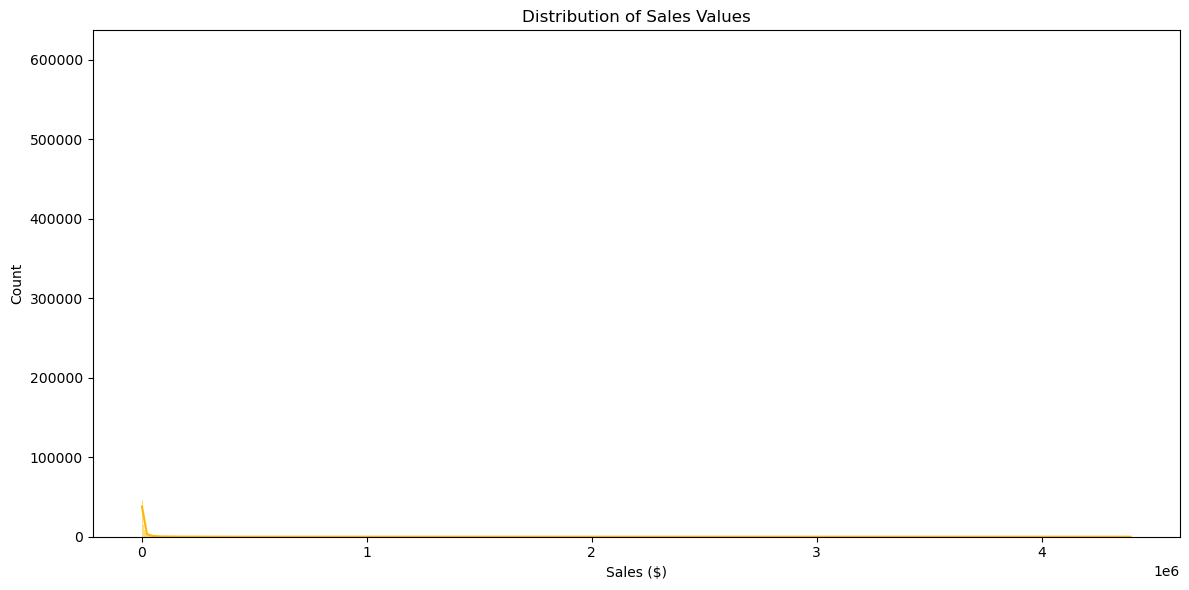

In [54]:
# Distribution of sales
plt.figure(figsize=(12, 6))
if 'sales_dollars_value' in sales_df.columns:
    sns.histplot(sales_df['sales_dollars_value'], kde=True, color='#fcb900')
    plt.title('Distribution of Sales Values')
    plt.xlabel('Sales ($)')
    plt.tight_layout()
    plt.show()

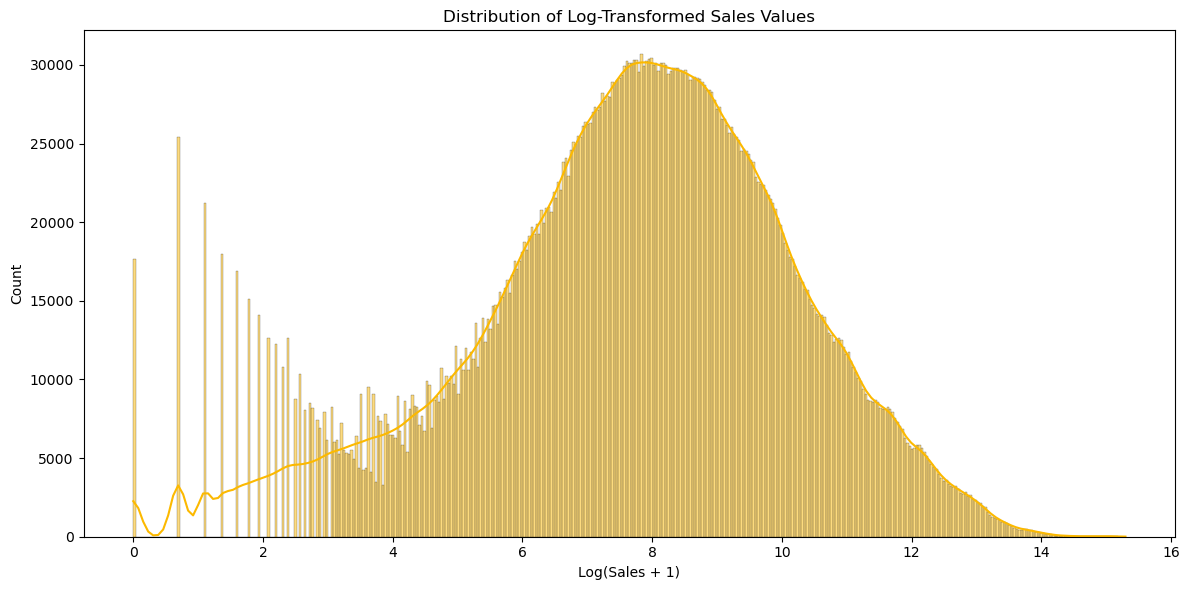

In [53]:
# Distribution of  log of sales
log_sales = np.log1p(sales_df['sales_dollars_value'])  # log(1 + x) to handle 0 values

plt.figure(figsize=(12, 6))
sns.histplot(log_sales, kde=True, color='#fcb900')  # nice blue
plt.title('Distribution of Log-Transformed Sales Values')
plt.xlabel('Log(Sales + 1)')
plt.tight_layout()
plt.show()

Parsing '20-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '30-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '31-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '13-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '16-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '16-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '25-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '26-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '17-04-2014' in DD/MM/YY

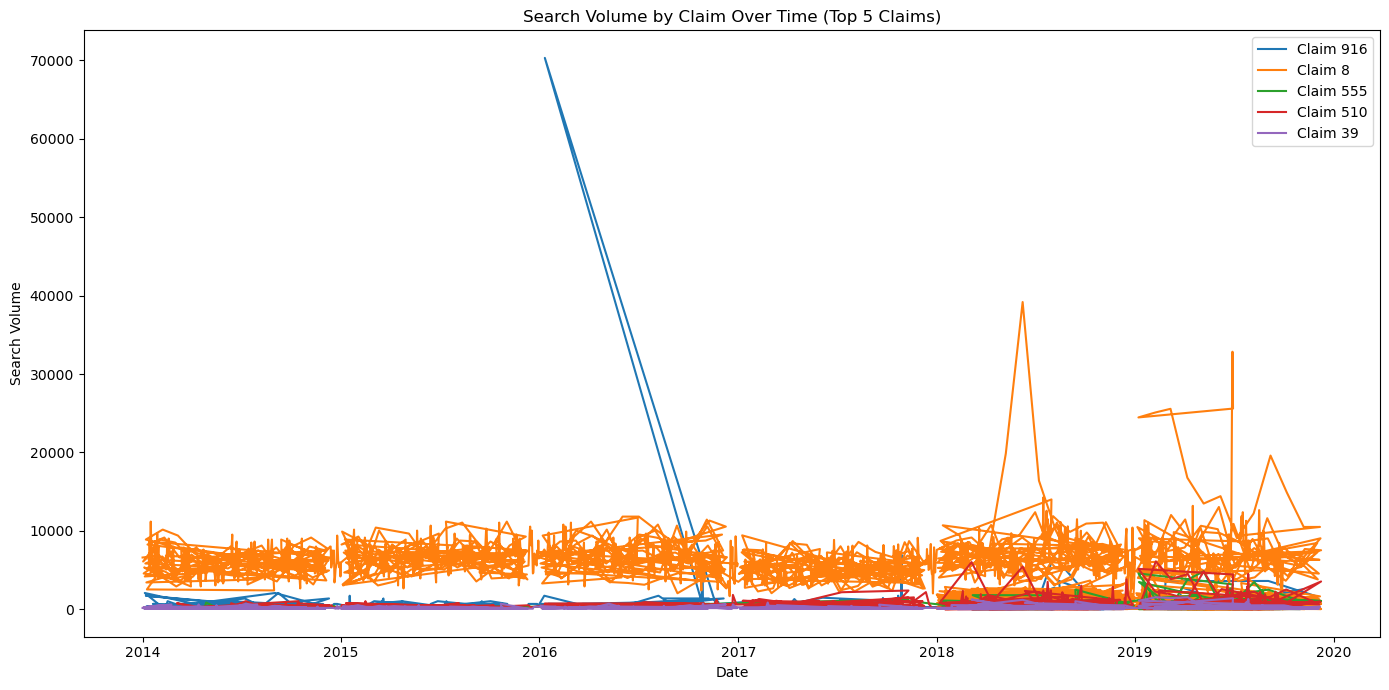

In [ ]:
# Time series analysis of Google search data
if 'date' in google_search_df.columns and 'searchvolume' in google_search_df.columns:
    google_temp = google_search_df.copy()
    google_temp['date'] = pd.to_datetime(google_temp['date'])
    
    plt.figure(figsize=(14, 7))
    for claim_id in google_temp['claim_id'].unique()[:5]:  # Just plot first 5 claims
        claim_data = google_temp[google_temp['claim_id'] == claim_id]
        plt.plot(claim_data['date'], claim_data['searchvolume'], label=f'Claim {claim_id}')
    
    plt.title('Search Volume by Claim Over Time (Top 5 Claims)')
    plt.xlabel('Date')
    plt.ylabel('Search Volume')
    plt.legend()
    plt.tight_layout()
    plt.show()

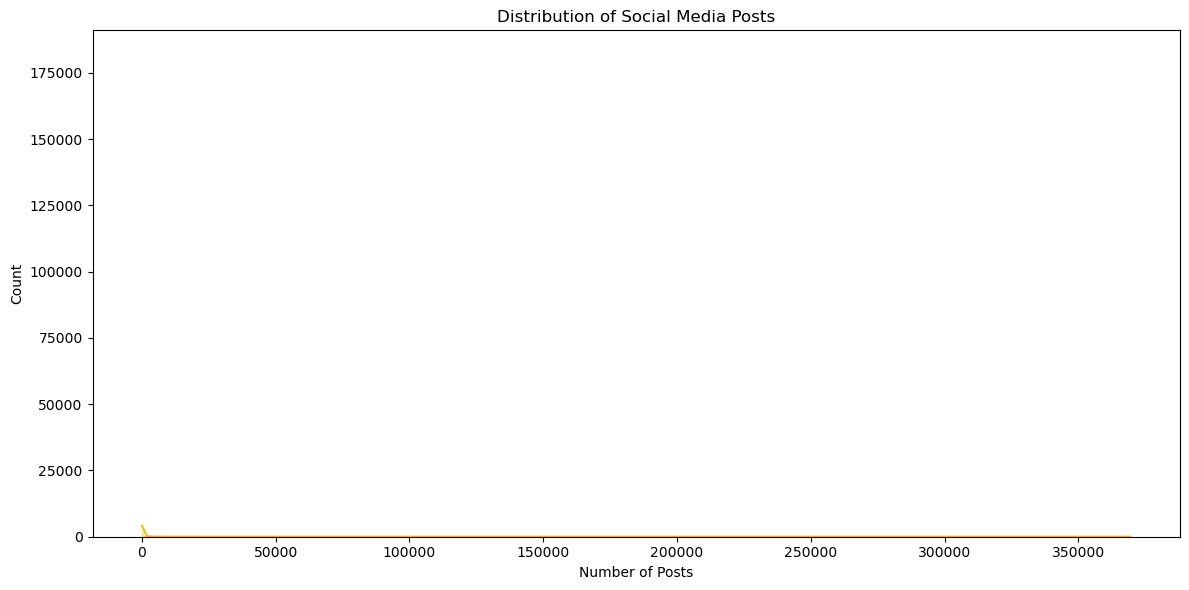

In [55]:
# Distribution of social media posts
if 'total_post' in social_media_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(social_media_df['total_post'], kde=True, color='#fcb900')
    plt.title('Distribution of Social Media Posts')
    plt.xlabel('Number of Posts')
    plt.tight_layout()
    plt.show()

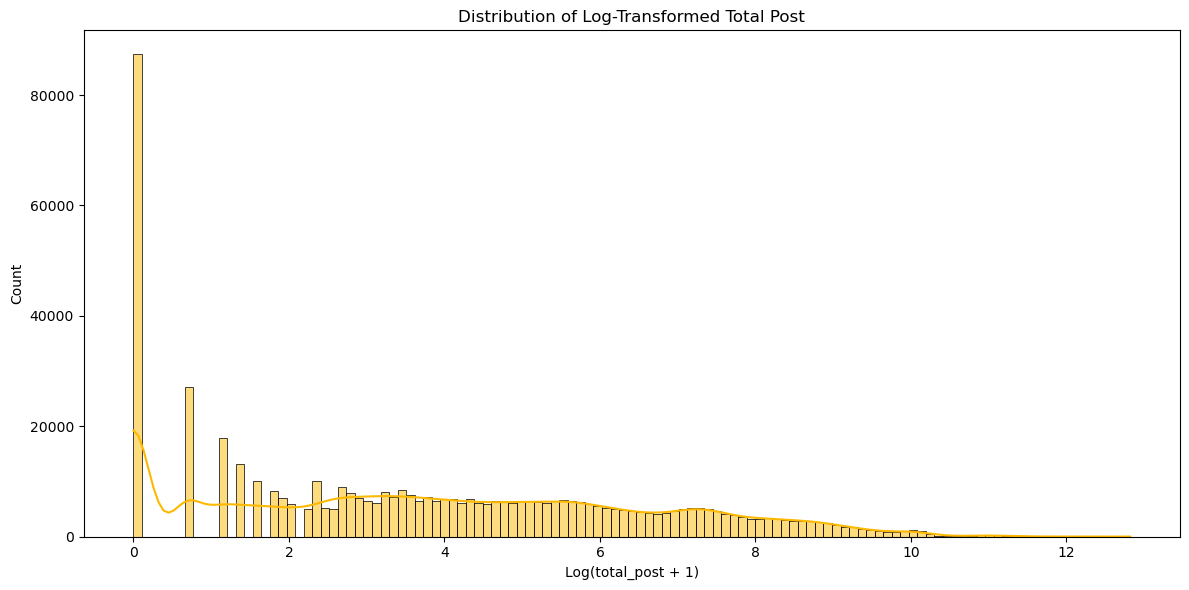

In [57]:
# Distribution of  log of sales
log_total_posts = np.log1p(social_media_df['total_post'])  # log(1 + x) to handle 0 values

plt.figure(figsize=(12, 6))
sns.histplot(log_total_posts, kde=True, color='#fcb900')  # nice blue
plt.title('Distribution of Log-Transformed Total Post')
plt.xlabel('Log(total_post + 1)')
plt.tight_layout()
plt.show()

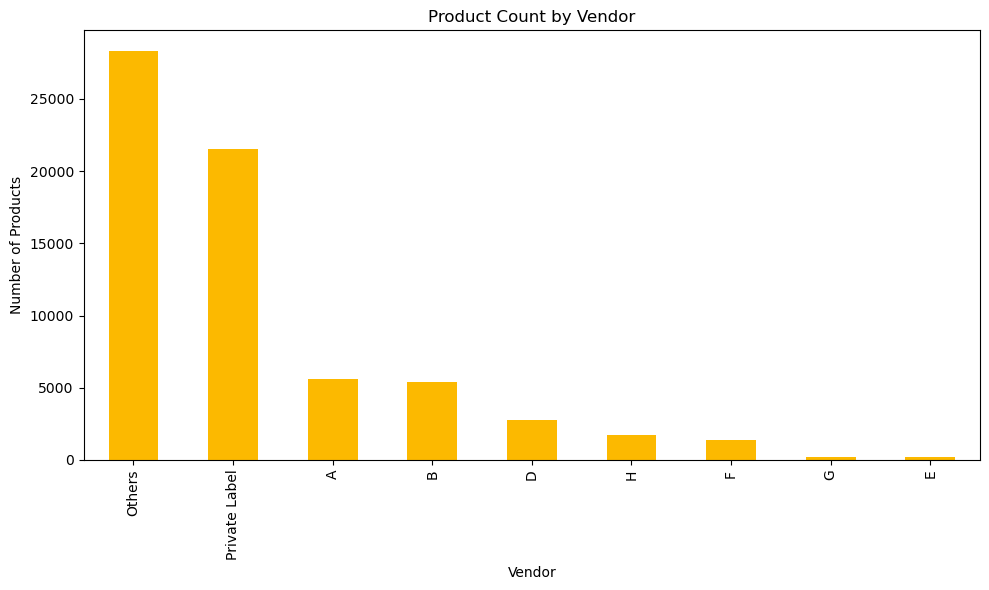

In [56]:
# Vendor distribution in manufacturer data
if 'vendor' in manufacturer_df.columns:
    plt.figure(figsize=(10, 6))
    vendor_counts = manufacturer_df['vendor'].value_counts()
    vendor_counts.plot.bar(title='Product Count by Vendor', color='#fcb900')
    plt.xlabel('Vendor')
    plt.ylabel('Number of Products')
    plt.tight_layout()
    plt.show()


Products per theme statistics:
count       51.000000
mean      1793.823529
std       4865.194552
min          1.000000
25%         28.500000
50%        286.000000
75%       1435.000000
max      29152.000000
Name: product_count, dtype: float64


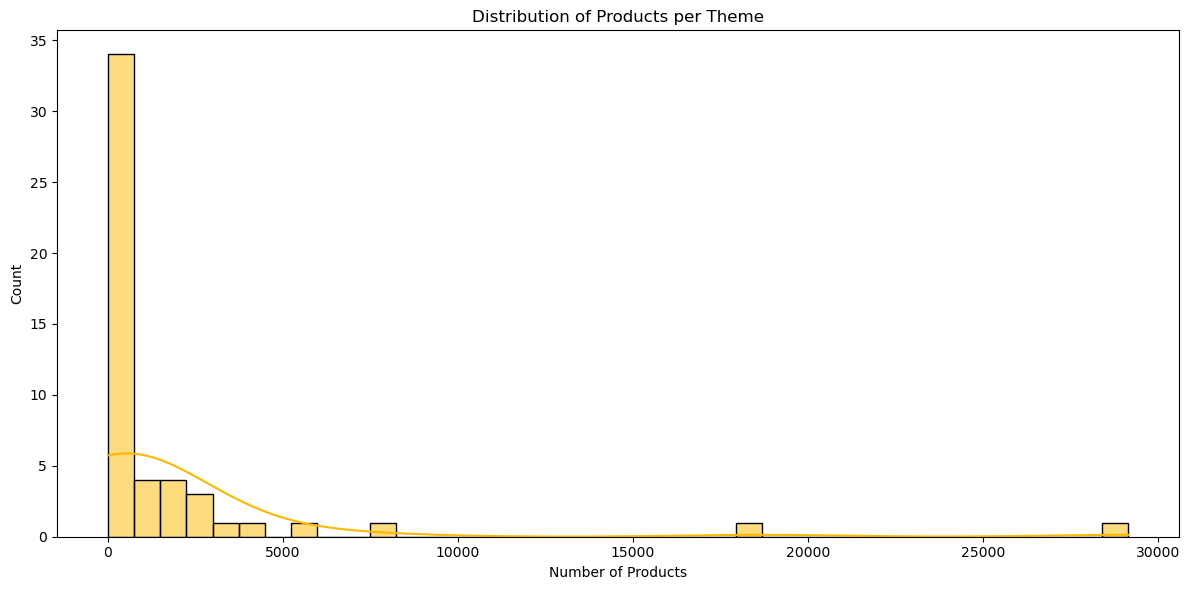

In [58]:
# Relationship analyses

# Theme to product mapping analysis
theme_product_counts = theme_product_df.groupby('claim_id').size().reset_index(name='product_count')
print("\nProducts per theme statistics:")
print(theme_product_counts['product_count'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(theme_product_counts['product_count'], kde=True, color='#fcb900')
plt.title('Distribution of Products per Theme')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

In [ ]:
# Basic cleaning
if 'manufacturer_df' in locals():
    manufacturer_df.drop(
        columns=['unnamed: 2', 'unnamed: 3', 'unnamed: 4', 'unnamed: 5', 'unnamed: 6'],
        inplace=True,
        errors='ignore'
    )

if 'social_media_df' in locals():
    social_media_df.dropna(inplace=True)
    social_media_df = social_media_df.rename(columns={'theme id': 'claim_id'})

# Save for next notebook
cleaned_folder = op.join('data', 'cleaned')
os.makedirs(cleaned_folder, exist_ok=True)

theme_list_df.to_parquet(op.join(cleaned_folder, 'theme_list.parquet'), index=False)
theme_product_df.to_parquet(op.join(cleaned_folder, 'theme_product_list.parquet'), index=False)
manufacturer_df.to_parquet(op.join(cleaned_folder, 'product_manufacturer_list.parquet'), index=False)
google_search_df.to_parquet(op.join(cleaned_folder, 'google_search_data.parquet'), index=False)
sales_df.to_parquet(op.join(cleaned_folder, 'sales_data.parquet'), index=False)
social_media_df.to_parquet(op.join(cleaned_folder, 'social_media_data.parquet'), index=False)

print("EDA complete! Data saved for preprocessing.")

EDA complete! Data saved for preprocessing.


: 

In [9]:
theme_list_df = load_dataset(context, 'raw/theme_list')
theme_product_df = load_dataset(context, 'raw/theme_product_list')
manufacturer_df = load_dataset(context, 'raw/product_manufacturer_list')
google_search_df = load_dataset(context, 'raw/google_search_data')
sales_df = load_dataset(context, 'raw/sales_data')
social_media_df = load_dataset(context, 'raw/social_media_data')

/home/alisaz/case_study/case-study/src/../data/raw/Theme_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/Theme_product_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/product_manufacturer_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/google_search_data.csv
/home/alisaz/case_study/case-study/src/../data/raw/sales_data.csv
/home/alisaz/case_study/case-study/src/../data/raw/social_media_data.csv


# Exploratory Analysis

Given the raw data from data ingestion, we would now like to explore and learn more details about the data.


The output of the step would be a summary report and discussion of any pertinent findings.


In [9]:
# Import the eda API
import ta_lib.eda.api as eda
from  ta_lib.core.api import setanalyse

## Variable summary

In [10]:
display_as_tabs([
    ('Theme List', theme_list_df.shape),
    ('Theme Product List', theme_product_df.shape),
    ('Manufacturer List', manufacturer_df.shape),
    ('Google Search Data', google_search_df.shape),
    ('Sales Data', sales_df.shape),
    ('Social Media Data', social_media_df.shape)
])

Tabs
    [0] Str(tuple, name='Theme List')
    [1] Str(tuple, name='Theme Product List')
    [2] Str(tuple, name='Manufacturer List')
    [3] Str(tuple, name='Google Search Data')
    [4] Str(tuple, name='Sales Data')
    [5] Str(tuple, name='Social Media Data')

In [11]:
social_media_df['published_date'] = pd.to_datetime(social_media_df['published_date'], errors='coerce', infer_datetime_format=True)


In [12]:
theme_list_summary = eda.get_variable_summary(theme_list_df)
theme_product_summary = eda.get_variable_summary(theme_product_df)
manufacturer_summary = eda.get_variable_summary(manufacturer_df)
google_search_summary = eda.get_variable_summary(google_search_df)
sales_summary = eda.get_variable_summary(sales_df)
social_media_summary = eda.get_variable_summary(social_media_df)



In [13]:
display_as_tabs([
    ('Theme List', theme_list_summary),
    ('Theme Product List', theme_product_summary),
    ('Manufacturer List', manufacturer_summary),
    ('Google Search Data', google_search_summary),
    ('Sales Data', sales_summary),
    ('Social Media Data', social_media_summary)
])

Tabs
    [0] DataFrame(height=300, name='Theme List', sizing_mode='fixed', value=           Variable Name D..., width=800)
    [1] DataFrame(height=300, name='Theme Product List', sizing_mode='fixed', value=           Variable Name D..., width=800)
    [2] DataFrame(height=300, name='Manufacturer List', sizing_mode='fixed', value=           Variable Name D..., width=800)
    [3] DataFrame(height=300, name='Google Search Data', sizing_mode='fixed', value=             Variable Name..., width=800)
    [4] DataFrame(height=300, name='Sales Data', sizing_mode='fixed', value=                          ..., width=800)
    [5] DataFrame(height=300, name='Social Media Data', sizing_mode='fixed', value=                 Variable ..., width=800)

In [14]:
verification_dict = {}
sales_ge = ge.from_pandas(sales_df)

# Rule 1: Check if product_id is not null
if 'product_id' in sales_df.columns:
    verification_dict["rule_1_check"] = sales_ge.expect_column_values_to_not_be_null(
        "product_id", 
        result_format="BASIC", 
        include_config=True
    ).to_json_dict()
    
    if verification_dict["rule_1_check"]["success"]:
        print("Rule 1 passed: All product_id values are not null")
    else:
        print("Rule 1 failed: Some product_id values are null")


Rule 1 passed: All product_id values are not null


In [15]:
# Rule 2: Check if sales_units_value is of type numeric
if 'sales_units_value' in sales_df.columns:
    verification_dict["rule_2_check"] = sales_ge.expect_column_values_to_be_in_type_list(
        "sales_units_value", 
        ["int", "float", "int64", "float64"], 
        result_format="BASIC", 
        include_config=True
    ).to_json_dict()
    
    if verification_dict["rule_2_check"]["success"]:
        print("Rule 2 passed: sales_units_value is of numeric type")
    else:
        print("Rule 2 failed: sales_units_value is not of numeric type")

# Rule 3: Calculate derived metrics and validate
if all(col in sales_df.columns for col in ['sales_dollars_value', 'sales_units_value']):
    # Calculate average price per unit
    sales_ge["avg_price_per_unit"] = sales_ge["sales_dollars_value"] / sales_ge["sales_units_value"]
    
    # Check if the average price is within reasonable bounds (example: between $0.01 and $10,000)
    verification_dict["rule_3_check"] = sales_ge.expect_column_values_to_be_between(
        "avg_price_per_unit", 
        min_value=0.01, 
        max_value=10000,
        mostly=0.95,  # Allow 5% of values to be outside this range
        result_format="BASIC", 
        include_config=True
    ).to_json_dict()
    
    if verification_dict["rule_3_check"]["success"]:
        print("Rule 3 passed: 95% of average price per unit values are within reasonable bounds")
    else:
        print("Rule 3 failed: More than 5% of average price per unit values are outside reasonable bounds")

# Rule 4: Check date format in social media data
if 'published_date' in social_media_df.columns:
    social_media_ge = ge.from_pandas(social_media_df)
    try:
        # Convert to datetime to validate format
        pd.to_datetime(social_media_df['published_date'])
        print("Rule 4 passed: published_date is in valid datetime format")
    except:
        print("Rule 4 failed: published_date is not in valid datetime format")

# Rule 5: Validate relationships between datasets - check if product_ids in sales exist in manufacturer list
if 'product_id' in sales_df.columns and 'PRODUCT_ID' in manufacturer_df.columns:
    # Normalize case for comparison
    sales_products = sales_df.product_id.astype(str).tolist()
    manufacturer_products = manufacturer_df.PRODUCT_ID.astype(str).tolist()
    
    # Use setanalyse to find common, missing, and extra items
    result = setanalyse(sales_products, manufacturer_products)
    
    # Calculate missing products
    missing_products_count = len(set(sales_products) - set(manufacturer_products))
    missing_percent = round((missing_products_count / len(sales_products)) * 100, 2) if sales_products else 0
    
    print(f'Records affected due to missing keys are {missing_products_count} accounting to {missing_percent}% of sales')
    
    # If more than 5% missing, flag as an issue
    if missing_percent > 5:
        print("WARNING: More than 5% of product IDs in sales data are missing from manufacturer list")

# Rule 6: Check for duplicate keys in reference data tables
for df_name, df, key_col in [
        ('Theme List', theme_list_df, 'CLAIM_ID'), 
        ('Manufacturer List', manufacturer_df, 'PRODUCT_ID'),
        ('Theme Product List', theme_product_df, 'PRODUCT_ID')
    ]:
    
    if key_col in df.columns:
        df_freq = df[key_col].value_counts().reset_index()
        df_freq.columns = [key_col, 'Frequency']
        duplicates = df_freq[df_freq.Frequency > 1]
        
        if len(duplicates) > 0:
            print(f"Found {len(duplicates)} duplicates in {df_name} primary key. Sample duplicates are:")
            print(duplicates.head())
        else:
            print(f"No duplicates in {df_name} primary key")

# Rule 7: Check for completeness of date information in time series data
if 'date' in google_search_df.columns:
    date_counts = google_search_df.groupby(['year_new', 'week_number']).size().reset_index(name='count')
    expected_count = google_search_df['Claim_ID'].nunique() * google_search_df['platform'].nunique()
    
    missing_weeks = date_counts[date_counts['count'] != expected_count]
    
    if len(missing_weeks) > 0:
        print(f"Found {len(missing_weeks)} weeks with incomplete data in Google Search Data")
    else:
        print("Complete time series data found in Google Search Data")

# Clean up temporary columns in sales_ge
if 'avg_price_per_unit' in sales_ge.columns:
    sales_df = sales_ge.drop('avg_price_per_unit', axis=1)
sales_df = pd.DataFrame(sales_ge)


Rule 2 passed: sales_units_value is of numeric type
Rule 3 passed: 95% of average price per unit values are within reasonable bounds
Rule 4 passed: published_date is in valid datetime format
Records affected due to missing keys are 0 accounting to 0.0% of sales
No duplicates in Theme List primary key
No duplicates in Manufacturer List primary key
Found 14989 duplicates in Theme Product List primary key. Sample duplicates are:
   PRODUCT_ID  Frequency
0       28136         14
1       18693         14
2       27053         14
3       27051         14
4       27076         14
Found 300 weeks with incomplete data in Google Search Data


In [16]:
# Generate data health summaries and plots
theme_list_sum, theme_list_plot = eda.get_data_health_summary(theme_list_df, return_plot=True)
theme_product_sum, theme_product_plot = eda.get_data_health_summary(theme_product_df, return_plot=True)
manufacturer_sum, manufacturer_plot = eda.get_data_health_summary(manufacturer_df, return_plot=True)
google_search_sum, google_search_plot = eda.get_data_health_summary(google_search_df, return_plot=True)
sales_sum, sales_plot = eda.get_data_health_summary(sales_df, return_plot=True)
social_media_sum, social_media_plot = eda.get_data_health_summary(social_media_df, return_plot=True)

# Display health summaries in tabs
display_as_tabs([
    ('Theme List', theme_list_plot),
    ('Theme Product List', theme_product_plot),
    ('Manufacturer List', manufacturer_plot),
    ('Google Search Data', google_search_plot),
    ('Sales Data', sales_plot),
    ('Social Media Data', social_media_plot)
])

Tabs
    [0] HoloViews(Layout, name='Theme List')
    [1] HoloViews(Layout, name='Theme Product List')
    [2] HoloViews(Layout, name='Manufacturer List')
    [3] HoloViews(Layout, name='Google Search Data')
    [4] HoloViews(Layout, name='Sales Data')
    [5] HoloViews(Layout, name='Social Media Data')

In [18]:

from ta_lib.reports.api import summary_report

summary_report(theme_list_df, './theme_list_summary.html')
summary_report(theme_product_df, './theme_product_list_summary.html')
summary_report(manufacturer_df, './manufacturer_list_summary.html')
summary_report(google_search_df, './google_search_data_summary.html')
summary_report(sales_df, './sales_data_summary.html')
summary_report(social_media_df, './social_media_data_summary.html')

print("Summary reports have been generated for all datasets:")
print("- Theme List: ./theme_list_summary.html")
print("- Theme Product List: ./theme_product_list_summary.html")
print("- Manufacturer List: ./manufacturer_list_summary.html")
print("- Google Search Data: ./google_search_data_summary.html")
print("- Sales Data: ./sales_data_summary.html")
print("- Social Media Data: ./social_media_data_summary.html")

Summary reports have been generated for all datasets:
- Theme List: ./theme_list_summary.html
- Theme Product List: ./theme_product_list_summary.html
- Manufacturer List: ./manufacturer_list_summary.html
- Google Search Data: ./google_search_data_summary.html
- Sales Data: ./sales_data_summary.html
- Social Media Data: ./social_media_data_summary.html


# Data Preparation from social media, google search and sales data.

    


Demonstrates:

●	Provide the list of themes available across all data sources

●	Understands consumer preference(themes) available in each data source

●	Provide a report for data sufficiency, sparsity and anomalies in each data source

●	Recommend the time granularity (Daily/Weekly/Monthly/Quarterly/Yearly) for the analysis


## Provide the list of themes available across all data sources

In [10]:
# Load all raw datasets
theme_list_df = load_dataset(context, 'raw/theme_list')
theme_product_df = load_dataset(context, 'raw/theme_product_list')
manufacturer_df = load_dataset(context, 'raw/product_manufacturer_list')
google_search_df = load_dataset(context, 'raw/google_search_data')
sales_df = load_dataset(context, 'raw/sales_data')
social_media_df = load_dataset(context, 'raw/social_media_data')

/home/alisaz/case_study/case-study/src/../data/raw/Theme_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/Theme_product_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/product_manufacturer_list.csv
/home/alisaz/case_study/case-study/src/../data/raw/google_search_data.csv
/home/alisaz/case_study/case-study/src/../data/raw/sales_data.csv
/home/alisaz/case_study/case-study/src/../data/raw/social_media_data.csv


In [68]:
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
from upsetplot import UpSet
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline 
sns.set_theme(style="whitegrid", font_scale=1.2)

# Parse datetime columns 
google_search_df['date'] = pd.to_datetime(google_search_df['date'], format='%d-%m-%Y', errors='coerce') 
social_media_df['published_date'] = pd.to_datetime(social_media_df['published_date'], errors='coerce') 
sales_df['system_calendar_key_N'] = pd.to_datetime(sales_df['system_calendar_key_N'], format='%Y%m%d', errors='coerce')

# Build Claim Name lookup from theme_list_df 
theme_lookup = theme_list_df.set_index('CLAIM_ID')['Claim Name'].to_dict()

# Map Claim Names 
google_search_df['Claim Name'] = google_search_df['Claim_ID'].map(theme_lookup) 
social_media_df['Claim Name'] = social_media_df['Theme Id'].dropna().astype(int).map(theme_lookup) 
theme_product_df['Claim Name'] = theme_product_df['CLAIM_ID'].map(theme_lookup)

# Remove "No Claims" from sales data
# First, get product IDs that are linked to claims
products_with_claims = theme_product_df.copy()
# Remove any products that are linked to "No Claims" theme (assuming "No Claims" might have a specific ID)
if 'No Claims' in theme_lookup.values():
    no_claims_id = [k for k, v in theme_lookup.items() if v == 'No Claims']
    if no_claims_id:
        products_with_claims = products_with_claims[~products_with_claims['CLAIM_ID'].isin(no_claims_id)]

# Filter sales data to only include products with valid claims
sales_with_claims = sales_df[sales_df['product_id'].isin(products_with_claims['PRODUCT_ID'])]
print(f"Original sales data: {len(sales_df)} rows")
print(f"Sales data with claims only: {len(sales_with_claims)} rows")
print(f"Removed {len(sales_df) - len(sales_with_claims)} rows with no claims")

# Create presence matrix for each theme 
theme_presence_df = theme_list_df[['CLAIM_ID', 'Claim Name']].copy() 
theme_presence_df['In Google'] = theme_presence_df['CLAIM_ID'].isin(google_search_df['Claim_ID'].unique()) 
theme_presence_df['In Social Media'] = theme_presence_df['CLAIM_ID'].isin(social_media_df['Theme Id'].dropna().astype(int).unique()) 
theme_presence_df['In Sales'] = theme_presence_df['CLAIM_ID'].isin(theme_product_df['CLAIM_ID'].unique()) 

# Calculate the total coverage for each theme
theme_presence_df['Data Sources Count'] = theme_presence_df[['In Google', 'In Social Media', 'In Sales']].sum(axis=1)


Original sales data: 4526182 rows
Sales data with claims only: 4526182 rows
Removed 0 rows with no claims


In [69]:
# View the presence matrix 
print("\nThemes across all data sources:") 
print(theme_presence_df[['Claim Name', 'In Google', 'In Social Media', 'In Sales', 'Data Sources Count']].head())

# Get counts of themes in each data source
themes_in_google = sum(theme_presence_df['In Google'])
themes_in_social = sum(theme_presence_df['In Social Media'])
themes_in_sales = sum(theme_presence_df['In Sales'])
total_themes = len(theme_presence_df)

print(f"\nTotal number of themes: {total_themes}")
print(f"Themes in Google Search data: {themes_in_google} ({themes_in_google/total_themes:.1%})")
print(f"Themes in Social Media data: {themes_in_social} ({themes_in_social/total_themes:.1%})")
print(f"Themes in Sales data: {themes_in_sales} ({themes_in_sales/total_themes:.1%})")


Themes across all data sources:
  Claim Name  In Google  In Social Media  In Sales  Data Sources Count
0   No Claim      False            False      True                   1
1   low carb       True             True      True                   3
2      beans      False             True      True                   2
3      cocoa      False            False      True                   1
4    vanilla      False             True     False                   1

Total number of themes: 208
Themes in Google Search data: 160 (76.9%)
Themes in Social Media data: 193 (92.8%)
Themes in Sales data: 51 (24.5%)


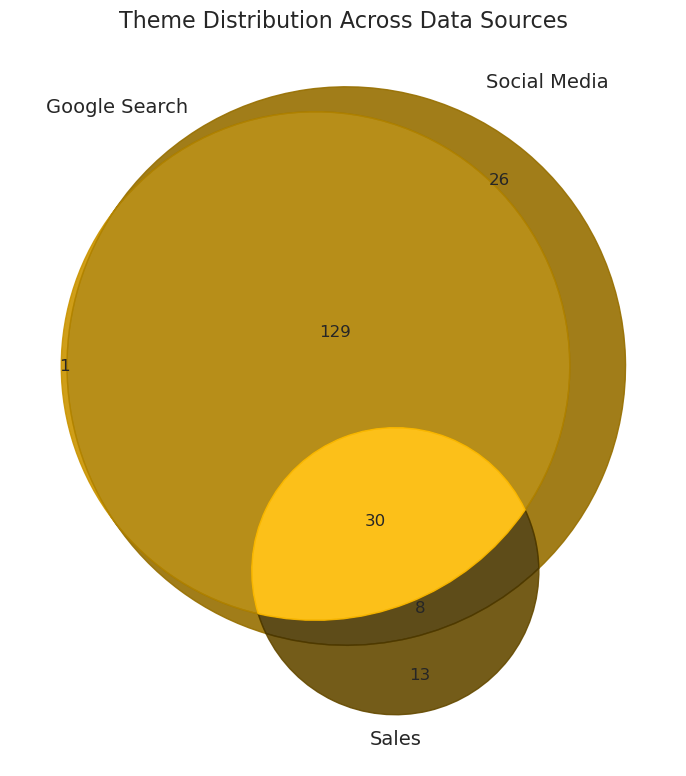

In [79]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def blend_with_black(color, amount=0.0):
    """
    Blend the given color with black.
    amount = 0 returns the original color,
    amount = 1 returns black.
    """
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgb(c)
    blended = tuple((1 - amount) * comp for comp in c)
    return blended

# Create sets
google_themes = set(theme_presence_df[theme_presence_df['In Google']]['CLAIM_ID'])
social_themes = set(theme_presence_df[theme_presence_df['In Social Media']]['CLAIM_ID'])
sales_themes = set(theme_presence_df[theme_presence_df['In Sales']]['CLAIM_ID'])

# Create the plot
plt.figure(figsize=(10, 8))

venn = venn3(
    [google_themes, social_themes, sales_themes], 
    ('Google Search', 'Social Media', 'Sales')
)

# Base color
base_color = '#fcb900'

# Define different blends (more black = darker)
patch_colors = {
    '100': blend_with_black(base_color, 0.2),  # Only Google
    '010': blend_with_black(base_color, 0.4),  # Only Social
    '001': blend_with_black(base_color, 0.6),  # Only Sales
    '110': blend_with_black(base_color, 0.3),  # Google + Social
    '101': blend_with_black(base_color, 0.5),  # Google + Sales
    '011': blend_with_black(base_color, 0.7),  # Social + Sales
    '111': blend_with_black(base_color, 0.0),  # All three (pure base color)
}

# Apply color shades
for patch_id, color in patch_colors.items():
    if venn.get_patch_by_id(patch_id):
        venn.get_patch_by_id(patch_id).set_color(color)
        venn.get_patch_by_id(patch_id).set_alpha(0.9)

# Style labels
for text in venn.set_labels:
    if text:
        text.set_fontsize(14)
for text in venn.subset_labels:
    if text:
        text.set_fontsize(12)

plt.title('Theme Distribution Across Data Sources', fontsize=16)
plt.tight_layout()
plt.show()


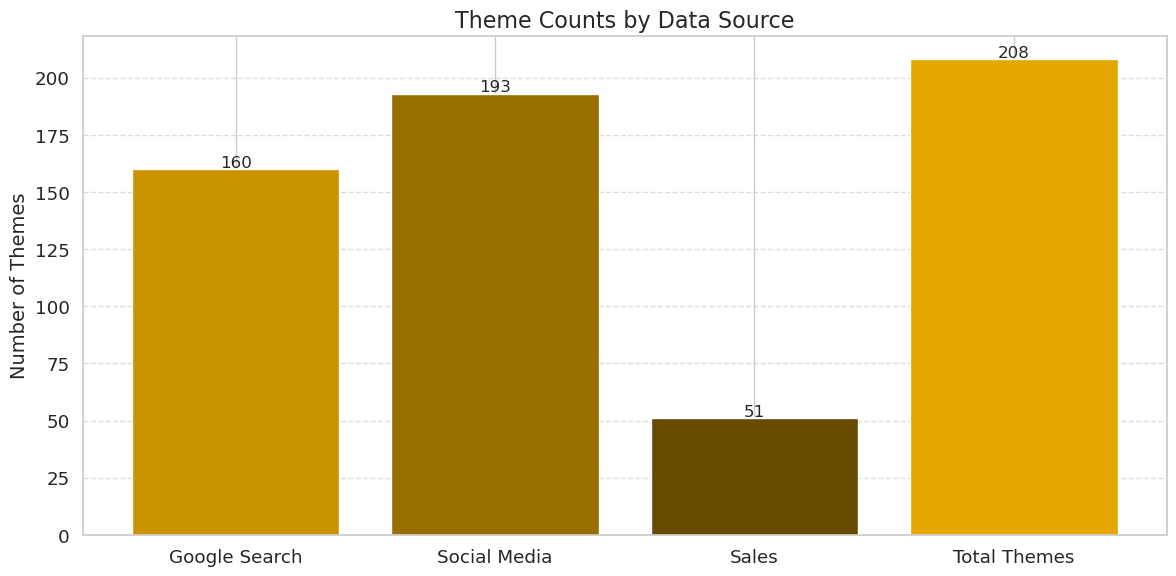

In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def blend_with_black(color, amount=0.0):
    """
    Blend the given color with black.
    amount = 0 returns the original color,
    amount = 1 returns black.
    """
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgb(c)
    blended = tuple((1 - amount) * comp for comp in c)
    return blended

# Bar chart
plt.figure(figsize=(12, 6))

# Data
source_counts = [themes_in_google, themes_in_social, themes_in_sales, total_themes]
source_labels = ['Google Search', 'Social Media', 'Sales', 'Total Themes']

# Define shades (lighter to darker)
base_color = '#fcb900'
bar_colors = [
    blend_with_black(base_color, 0.2),  # Google
    blend_with_black(base_color, 0.4),  # Social
    blend_with_black(base_color, 0.6),  # Sales
    blend_with_black(base_color, 0.1)   # Total Themes
]

bars = plt.bar(source_labels, source_counts, color=bar_colors)

plt.ylabel('Number of Themes', fontsize=14)
plt.title('Theme Counts by Data Source', fontsize=16)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., height + 1, 
        f'{int(height)}', ha='center', fontsize=12
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1200x800 with 0 Axes>

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



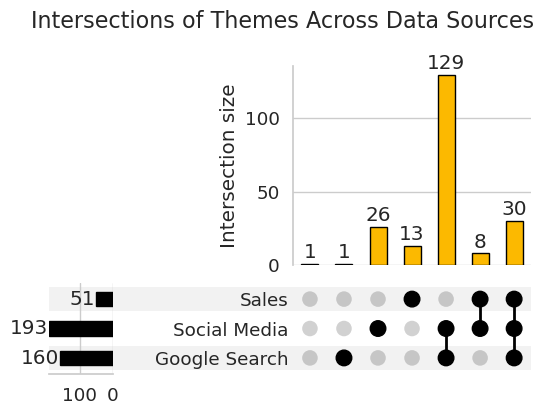

In [87]:
# VISUALIZATION 3: UpSet plot for better visualization of intersections
from upsetplot import UpSet
import matplotlib.pyplot as plt

# Create binary matrix
binary_matrix = theme_presence_df[['In Google', 'In Social Media', 'In Sales']]
binary_matrix.columns = ['Google Search', 'Social Media', 'Sales']

# Prepare data
upset_data = binary_matrix.value_counts()

# Plot
plt.figure(figsize=(12, 8))
axes_dict = UpSet(upset_data, show_counts=True, sort_categories_by=None).plot()

# Change bar colors
bar_color = '#fcb900'

# Find the bar plot axis from the axes_dict
bar_ax = axes_dict.get('intersections')  # the key 'intersections' corresponds to the main bars

if bar_ax:
    for patch in bar_ax.patches:
        patch.set_facecolor(bar_color)

plt.suptitle('Intersections of Themes Across Data Sources', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [83]:
# VISUALIZATION 4: Heatmap of themes by data source coverage
plt.figure(figsize=(14, 10))

# Sort themes by total coverage
sorted_theme_presence = theme_presence_df.sort_values(['Data Sources Count', 'CLAIM_ID'], ascending=[False, True])

# Get the top 30 themes for better visualization (or show all if less than 30)
top_n = min(30, len(sorted_theme_presence))
top_themes = sorted_theme_presence.head(top_n)

# Full list of themes and their presence
print("\nComplete list of themes and their data source presence:")
theme_summary = theme_presence_df[['Claim Name', 'In Google', 'In Social Media', 'In Sales', 'Data Sources Count']]
theme_summary = theme_summary.sort_values('Data Sources Count', ascending=False)
theme_summary



Complete list of themes and their data source presence:


,Claim Name,In Google,In Social Media,In Sales,Data Sources Count
56,sea salt,True,True,True,3
19,crab,True,True,True,3
57,soy foods,True,True,True,3
23,convenience - easy-to-prepare,True,True,True,3
53,mackerel,True,True,True,3
...,...,...,...,...,...
55,lobster,False,True,False,1
58,apple cinnamon,False,False,True,1
62,cream,False,True,False,1
207,caramel,False,True,False,1


<Figure size 1400x1000 with 0 Axes>

## Understands consumer preference(themes) available in each data source

Total Themes searched on Google: 160


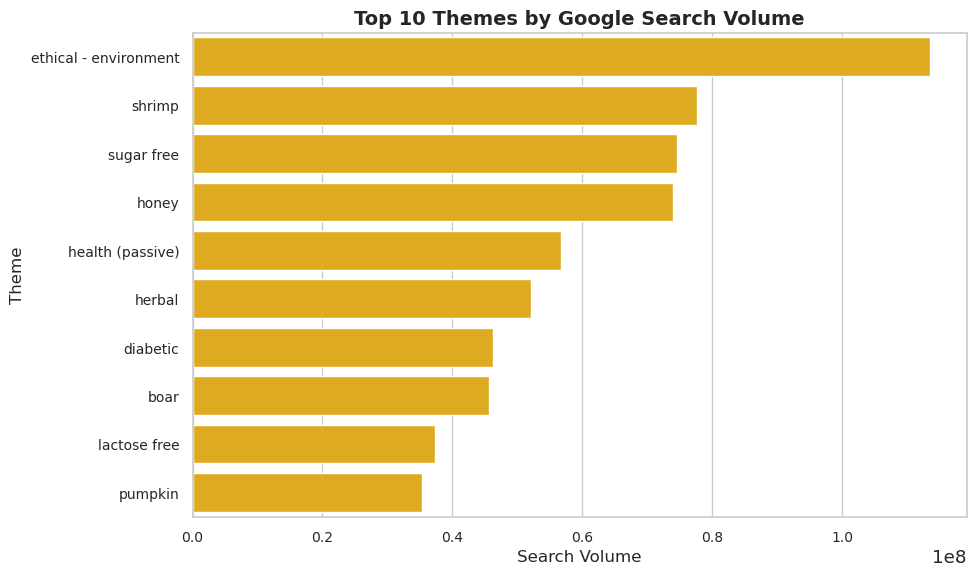

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style="whitegrid", font_scale=1.2)

google_search_df.rename(columns={'Claim_ID': 'CLAIM_ID'}, inplace=True)
merged_df = google_search_df.merge(theme_list_df, on="CLAIM_ID", how="left")

print(f"Total Themes searched on Google: {merged_df['Claim Name'].nunique()}")

search_summary = (
    merged_df.groupby('Claim Name', as_index=False)['searchVolume']
    .sum()
    .sort_values('searchVolume', ascending=False)
)

top_themes = search_summary.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_themes,
    x='searchVolume',
    y='Claim Name',
    color='#fcb900'
)
plt.title("Top 10 Themes by Google Search Volume", fontsize=14, weight='bold')
plt.xlabel("Search Volume", fontsize=12)
plt.ylabel("Theme", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Total Themes available in Sales Data: 48


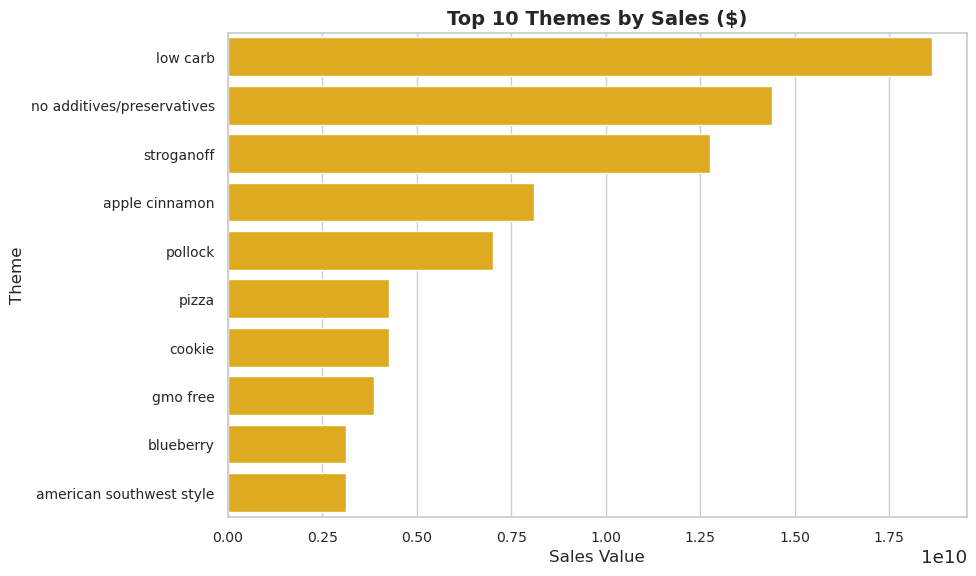

In [20]:
%matplotlib inline
sns.set_theme(style="whitegrid", font_scale=1.2)

sales_df.rename(columns={'product_id': 'PRODUCT_ID'}, inplace=True)

merged_sales = (
    sales_df
    .merge(theme_product_df, on='PRODUCT_ID', how='left')
    .merge(theme_list_df, on='CLAIM_ID', how='left')
)

# Remove missing or placeholder themes
filtered_sales = merged_sales[
    merged_sales['Claim Name'].notna() &
    (merged_sales['Claim Name'].str.lower() != 'no claim')
]

print(f"Total Themes available in Sales Data: {filtered_sales['Claim Name'].nunique()}")

sales_summary = (
    filtered_sales.groupby('Claim Name', as_index=False)['sales_dollars_value']
    .sum()
    .sort_values('sales_dollars_value', ascending=False)
)

top_sales_themes = sales_summary.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_sales_themes,
    x='sales_dollars_value',
    y='Claim Name',
    color='#fcb900'
)


plt.title("Top 10 Themes by Sales ($)", fontsize=14, weight='bold')
plt.xlabel("Sales Value", fontsize=12)
plt.ylabel("Theme", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Total Themes mentioned on Social Media: 193


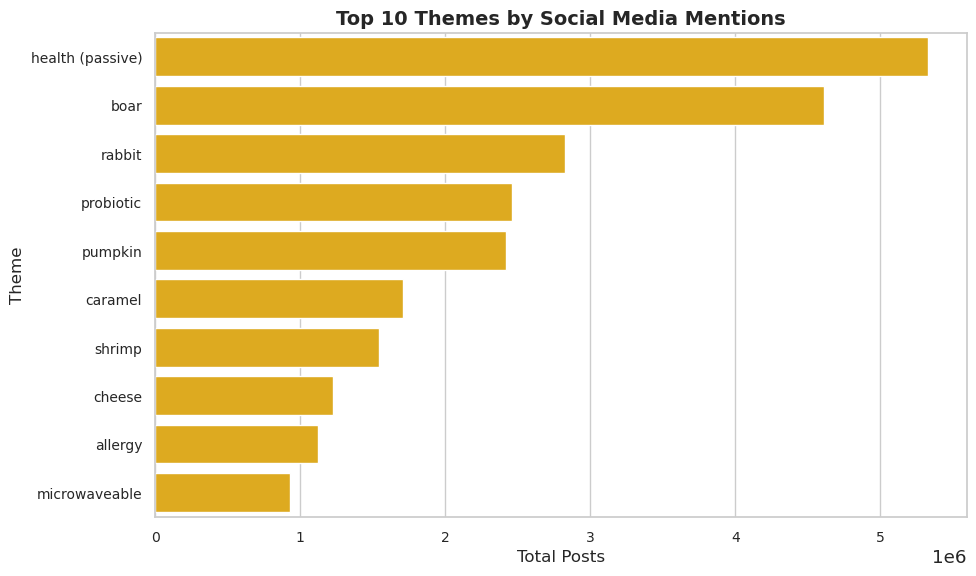

In [21]:
%matplotlib inline
sns.set_theme(style="whitegrid", font_scale=1.2)

social_media_df['Theme Id'] = social_media_df['Theme Id'].dropna().astype(int)

merged_social = social_media_df.merge(theme_list_df, left_on="Theme Id", right_on="CLAIM_ID", how="left")

print(f"Total Themes mentioned on Social Media: {merged_social['Claim Name'].nunique()}")

social_summary = (
    merged_social.groupby('Claim Name', as_index=False)['total_post']
    .sum()
    .sort_values('total_post', ascending=False)
)

top_social_themes = social_summary.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_social_themes,
    x='total_post',
    y='Claim Name',
    color='#fcb900'
)


plt.title("Top 10 Themes by Social Media Mentions", fontsize=14, weight='bold')
plt.xlabel("Total Posts", fontsize=12)
plt.ylabel("Theme", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Recommend the time granularity (Daily/Weekly/Monthly/Quarterly/Yearly) for the analysis

The code recommends the most suitable time granularity (Daily, Weekly, Monthly, Quarterly, or Yearly) for sales forecasting by analyzing how frequently and consistently sales data is recorded over time. It converts the date column to datetime, resamples the data at each granularity, and counts how many non-empty time periods exist. The goal is to choose the finest granularity that still has at least 12 valid time points, ensuring there's enough historical data to train a meaningful forecasting model while maintaining detail.

In [22]:
def recommend_time_granularity(sales_df: pd.DataFrame, google_df: pd.DataFrame, social_df: pd.DataFrame) -> str:
    sales_df['system_calendar_key_N'] = pd.to_datetime(sales_df['system_calendar_key_N'], errors='coerce')
    google_df['date'] = pd.to_datetime(google_df['date'], errors='coerce')
    social_df['published_date'] = pd.to_datetime(social_df['published_date'], errors='coerce')
    sales_df = sales_df.dropna(subset=['system_calendar_key_N'])
    sales_df.set_index('system_calendar_key_N', inplace=True)
    freq = {
        'Daily': sales_df.resample('D').sum().dropna().shape[0],
        'Weekly': sales_df.resample('W').sum().dropna().shape[0],
        'Monthly': sales_df.resample('M').sum().dropna().shape[0],
        'Quarterly': sales_df.resample('Q').sum().dropna().shape[0],
        'Yearly': sales_df.resample('Y').sum().dropna().shape[0]
    }
    sorted_freq = sorted(freq.items(), key=lambda x: -x[1])
    for granularity, count in sorted_freq:
        if count >= 12:
            return f"Recommended Time Granularity: {granularity}"
    return "Insufficient data for recommendation"


recommendation = recommend_time_granularity(sales_df, google_search_df, social_media_df)
recommendation

'Recommended Time Granularity: Daily'

strength = 1 - (var(residual) / var(seasonal + residual))


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

def recommend_time_granularity_seasonality_based(sales_df: pd.DataFrame) -> str:
    sales_df['system_calendar_key_N'] = pd.to_datetime(sales_df['system_calendar_key_N'], errors='coerce')
    sales_df = sales_df.dropna(subset=['system_calendar_key_N'])
    sales_df.set_index('system_calendar_key_N', inplace=True)
    
    granularities = {
        'Daily': 'D',
        'Weekly': 'W',
        'Monthly': 'M',
    }
    
    seasonal_strengths = {}

    for name, rule in granularities.items():
        resampled = sales_df.resample(rule).sum().dropna()
        if len(resampled) < 24:
            continue
        try:
            decomposition = seasonal_decompose(resampled['sales_dollars_value'], model='additive', period=12)
            strength = 1 - (np.var(decomposition.resid.dropna()) / (np.var(decomposition.seasonal + decomposition.resid.dropna()) + 1e-6))
            seasonal_strengths[name] = strength
        except:
            continue

    if not seasonal_strengths:
        return "Insufficient data for seasonality-based recommendation"
    
    recommended = max(seasonal_strengths.items(), key=lambda x: x[1])[0]
    return f"Recommended Time Granularity (Seasonality-Based): {recommended}"


seasonality_based = recommend_time_granularity_seasonality_based(sales_df)
print(seasonality_based)

Recommended Time Granularity (Seasonality-Based): Monthly


In [24]:
from statsmodels.tsa.stattools import acf

def recommend_time_granularity_autocorrelation(sales_df: pd.DataFrame) -> str:
    sales_df['system_calendar_key_N'] = pd.to_datetime(sales_df['system_calendar_key_N'], errors='coerce')
    sales_df = sales_df.dropna(subset=['system_calendar_key_N'])
    sales_df.set_index('system_calendar_key_N', inplace=True)

    ts = sales_df['sales_dollars_value'].resample('D').sum().dropna()
    
    if len(ts) < 30:
        return "Insufficient data for autocorrelation-based recommendation"
    
    autocorr = acf(ts, nlags=60, fft=True)
    significant_lags = np.where(autocorr > 0.5)[0]

    if len(significant_lags) == 0:
        return "No strong autocorrelation found"

    lag = significant_lags[1] if len(significant_lags) > 1 else significant_lags[0]
    
    if lag <= 7:
        return "Recommended Time Granularity (Autocorrelation-Based): Daily"
    elif 7 < lag <= 30:
        return "Recommended Time Granularity (Autocorrelation-Based): Weekly"
    elif 30 < lag <= 90:
        return "Recommended Time Granularity (Autocorrelation-Based): Monthly"
    elif 90 < lag <= 180:
        return "Recommended Time Granularity (Autocorrelation-Based): Quarterly"
    else:
        return "Recommended Time Granularity (Autocorrelation-Based): Yearly"
    
result = recommend_time_granularity_autocorrelation(sales_df)
print(result)

Recommended Time Granularity (Autocorrelation-Based): Daily


# Data exploration and Hypothesis Validation

Demonstrates:

●	Merge the required data sources

●	Understand the overall market share of our client

●	Find the potential competitors for our client in each theme

●	What are the themes which are emerging in social media, Google Search & Sales?

●	Validate the hypothesis: Trend flows from Social -> Search -> Sales

            o	What is the latency observed?
            o	Is the latency significantly different across themes?
            o	Pictorially represent transition between sources


In [11]:
manufacturer_df.drop(
    columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
    inplace=True,
    errors='ignore'
)

social_media_df.dropna(inplace=True)

In [12]:
sales_df.columns = sales_df.columns.str.lower()
theme_product_df.columns = theme_product_df.columns.str.lower()
google_search_df.columns = google_search_df.columns.str.lower()
social_media_df.columns = social_media_df.columns.str.lower()
manufacturer_df.columns = manufacturer_df.columns.str.lower()
theme_list_df.columns = theme_list_df.columns.str.lower()
social_media_df = social_media_df.rename(columns={'theme id': 'claim_id'})

In [14]:
# Count unique vendors per product
vendor_counts = manufacturer_df.groupby('product_id')['vendor'].nunique()

# Find products with more than one vendor
products_with_multiple_vendors = vendor_counts[vendor_counts > 1]

# Display the result
if not products_with_multiple_vendors.empty:
    print("Products with multiple vendors:")
    print(products_with_multiple_vendors)
else:
    print("✅ All products have only one vendor.")


✅ All products have only one vendor.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [16]:
sns.set(style="whitegrid", font_scale=1.1)

# 1) Normalize column names
for df in [theme_list_df, theme_product_df, manufacturer_df,
           google_search_df, social_media_df, sales_df]:
    df.columns = df.columns.str.lower()

In [17]:
# 2) Rename for clarity
theme_list_df    = theme_list_df.rename(columns={'claim name':'theme_name'})
google_search_df = google_search_df.rename(columns={'searchvolume':'search_volume'})
social_media_df  = social_media_df.rename(columns={
    'published_date':'social_date', 'total_post':'social_posts'
})
sales_df         = sales_df.rename(columns={'system_calendar_key_n':'sales_date'})

In [18]:
# 3) Parse ALL dates (no longer use the deprecated infer flag)
google_search_df['date']       = pd.to_datetime(google_search_df['date'], errors='coerce')
social_media_df['social_date'] = pd.to_datetime(social_media_df['social_date'], errors='coerce')
sales_df['sales_date']         = pd.to_datetime(sales_df['sales_date'].astype(str), errors='coerce')

Parsing '20-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '30-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '31-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '13-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '16-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '16-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '25-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '26-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

Parsing '17-04-2014' in DD/MM/YY

In [19]:
# Merge sales × theme × manufacturer ──
merged = (
    sales_df
    .merge(theme_product_df, on='product_id', how='left')
    .merge(theme_list_df,    on='claim_id',   how='left')
    .merge(manufacturer_df,  on='product_id', how='left')
)

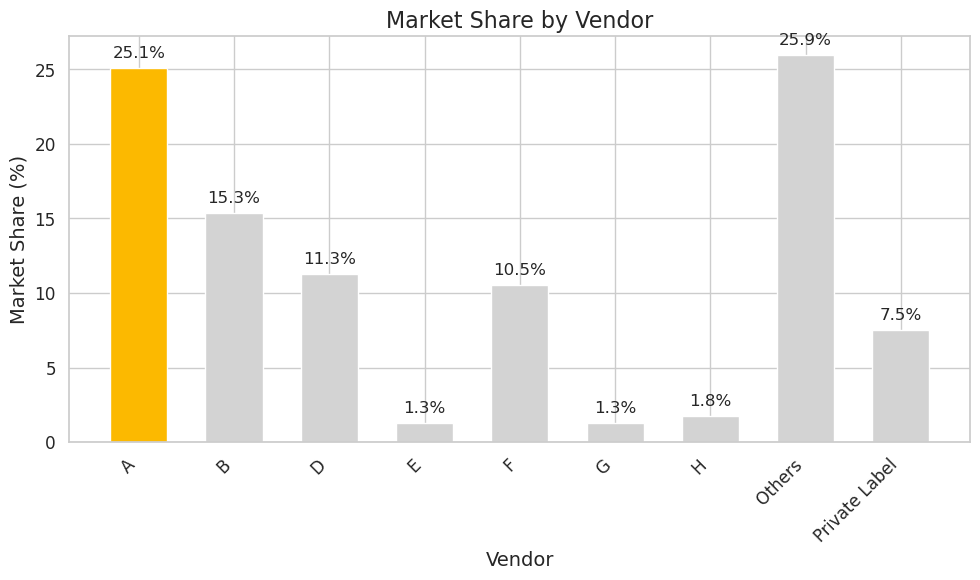

In [20]:
# Overall market share ──
ms = (
    merged
    .groupby('vendor')['sales_dollars_value']
    .sum()
    .reset_index(name='sales')
)
ms['market_share'] = 100 * ms['sales'] / ms['sales'].sum()

plt.figure(figsize=(10, 6))
colors = ['#fcb900' if v == 'A' else '#d3d3d3' for v in ms['vendor']]

bars = plt.bar(ms['vendor'], ms['market_share'], color=colors, width=0.6)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.5,
             f"{h:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title("Market Share by Vendor", fontsize=16)
plt.ylabel("Market Share (%)", fontsize=14)
plt.xlabel("Vendor", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


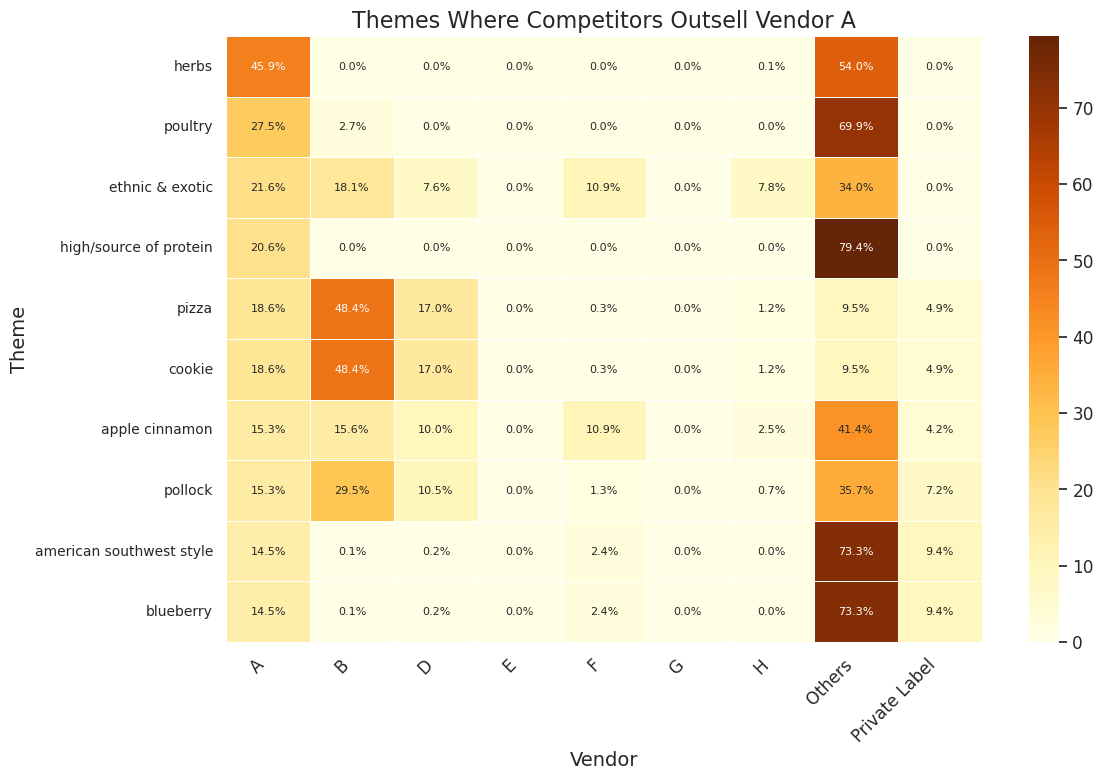

In [38]:
# Group and calculate vendor-wise sales % share per theme
tv = (
    merged
    .groupby(['theme_name', 'vendor'])['sales_dollars_value']
    .sum()
    .unstack(fill_value=0)
)

tv_pct = 100 * tv.div(tv.sum(axis=1), axis=0)

# Only proceed if 'A' exists
if 'A' in tv_pct.columns:
    # Find themes where any competitor has greater % share than Vendor 'A'
    mask = (tv_pct.drop(columns='A').gt(tv_pct['A'], axis=0)).any(axis=1)
    tv_pct_filtered = tv_pct[mask]

    # Sort by Vendor 'A' share descending (optional)
    tv_pct_filtered = tv_pct_filtered.sort_values('A', ascending=False)

    # Take Top 20 (after filtering)
    tv_pct_filtered = tv_pct_filtered.head(10)

    # Plot heatmap (NO top 20 cutoff now)
    plt.figure(figsize=(12, max(8, len(tv_pct_filtered) * 0.5)))  # dynamic height
    sns.heatmap(
        tv_pct_filtered,
        annot=tv_pct_filtered.round(1).astype(str) + '%',
        fmt='',
        cmap='YlOrBr',
        linewidths=0.5,
        linecolor='white',
        annot_kws={'fontsize':8}
    )
    plt.title("Themes Where Competitors Outsell Vendor A", fontsize=16)
    plt.xlabel("Vendor", fontsize=14)
    plt.ylabel("Theme", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Vendor 'A' not found in the data.")


In [21]:
social_media_df.rename(columns={
    'theme id': 'claim_id'
}, inplace=True)

social_wk = (
    social_media_df
      .assign(week=social_media_df['social_date'].dt.to_period('W').dt.start_time)
      .groupby(['claim_id','week'])['social_posts'].sum()
      .reset_index()
)
search_wk = (
    google_search_df
      .assign(week=google_search_df['date'].dt.to_period('W').dt.start_time)
      .groupby(['claim_id','week'])['search_volume'].sum()
      .reset_index()
)
sales_wk = (
    merged
      .assign(week=merged['sales_date'].dt.to_period('W').dt.start_time)
      .groupby(['claim_id','week'])['sales_dollars_value'].sum()
      .reset_index()
)

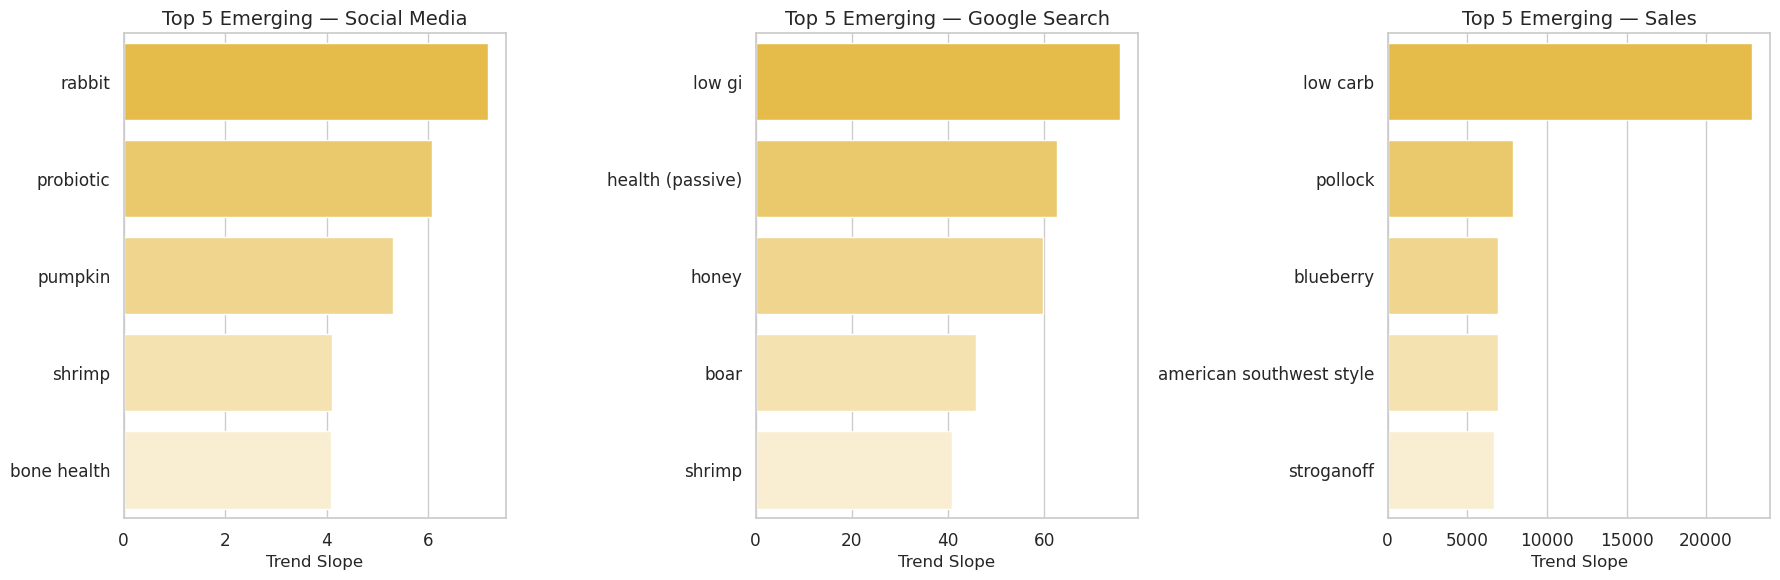

In [47]:
# Emerging‐theme slopes ──
# build weekly series

%matplotlib inline 
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.linear_model import LinearRegression

yellow_cmap = mcolors.LinearSegmentedColormap.from_list("yellow_cmap", ["white", "#fcb900"])

def lighten_color(color, amount=0.5):
    import colorsys
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgb(c)
    c = colorsys.rgb_to_hls(*c)
    new_color = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
    return new_color

def top_emerging(df, col, n=5):
    slopes = []
    for cid, grp in df.groupby('claim_id'):
        g = grp.sort_values('week')
        if len(g) < 3:
            continue
        X = (g['week'] - g['week'].min()).dt.days.values.reshape(-1,1)
        y = g[col].values
        m = LinearRegression().fit(X, y)
        slopes.append((cid, m.coef_[0]))
    return (
        pd.DataFrame(slopes, columns=['claim_id','slope'])
          .nlargest(n, 'slope')
          .merge(theme_list_df, on='claim_id')[['theme_name','slope']]
    )

def plot_top_all(datasets):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    base_color = '#fcb900'

    for ax, (df, col, title) in zip(axes, datasets):
        data = top_emerging(df, col, n=5)

        # Create shades of color
        shades = [
            lighten_color(base_color, 0.8 - 0.15*i)
            for i in range(len(data))
        ]

        sns.barplot(
            x='slope',
            y='theme_name',
            data=data,
            palette=shades,
            orient='h',
            ax=ax
        )
        ax.set_title(f"Top 5 Emerging — {title}", fontsize=14)
        ax.set_xlabel("Trend Slope", fontsize=12)
        ax.set_ylabel("")
    
    plt.tight_layout()
    plt.show()

datasets = [
    (social_wk, 'social_posts', "Social Media"),
    (search_wk, 'search_volume', "Google Search"),
    (sales_wk, 'sales_dollars_value', "Sales")
]

plot_top_all(datasets)


Latency summary (weeks):


,Social→Search,Search→Sales
mean,2.433333,18.9
50%,3.500000,9.0
max,197.000000,202.0


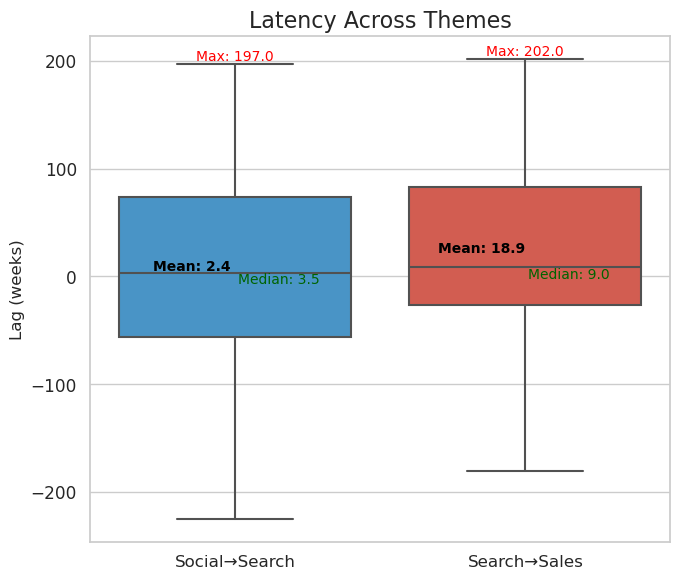

In [23]:
# Latency distribution ──
common = set(social_wk['claim_id']) & set(search_wk['claim_id']) & set(sales_wk['claim_id'])
lags = []
for cid in sorted(common):
    s = social_wk.query("claim_id==@cid").set_index('week')['social_posts']
    g = search_wk.query("claim_id==@cid").set_index('week')['search_volume']
    v = sales_wk.query("claim_id==@cid").set_index('week')['sales_dollars_value']
    idx = s.index.union(g.index).union(v.index)
    s,g,v = s.reindex(idx, fill_value=0), g.reindex(idx, fill_value=0), v.reindex(idx, fill_value=0)
    sp, gp, ap = s.idxmax(), g.idxmax(), v.idxmax()
    lags.append({
        'claim_id': cid,
        'Social→Search': (gp-sp).days//7,
        'Search→Sales':  (ap-gp).days//7
    })

lags_df = (
    pd.DataFrame(lags)
      .merge(theme_list_df, on='claim_id')[['theme_name','Social→Search','Search→Sales']]
)
print("Latency summary (weeks):")
display(lags_df[['Social→Search','Search→Sales']].describe().loc[['mean','50%','max']])

plt.figure(figsize=(7,6))
ax = sns.boxplot(
    data=lags_df[['Social→Search','Search→Sales']],
    palette=['#3498db','#e74c3c']
)

# Setting labels
plt.xticks([0,1], ['Social→Search','Search→Sales'], fontsize=12)
plt.ylabel('Lag (weeks)', fontsize=12)
plt.title('Latency Across Themes', fontsize=16)

# Calculate summary statistics
summary = lags_df[['Social→Search','Search→Sales']].describe().loc[['mean','50%','max']]
summary = summary.round(1)

# Add text annotations
for i, col in enumerate(summary.columns):
    mean_val = summary.at['mean', col]
    median_val = summary.at['50%', col]
    max_val = summary.at['max', col]

    # Mean - slightly shifted to left
    ax.text(i - 0.15, mean_val + 0.3, f"Mean: {mean_val}", 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    # Median - slightly shifted to right
    ax.text(i + 0.15, median_val - 0.3, f"Median: {median_val}", 
            ha='center', va='top', fontsize=10, color='darkgreen')
    
    # Max - above
    ax.text(i, max_val + 0.7, f"Max: {max_val}", 
            ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()


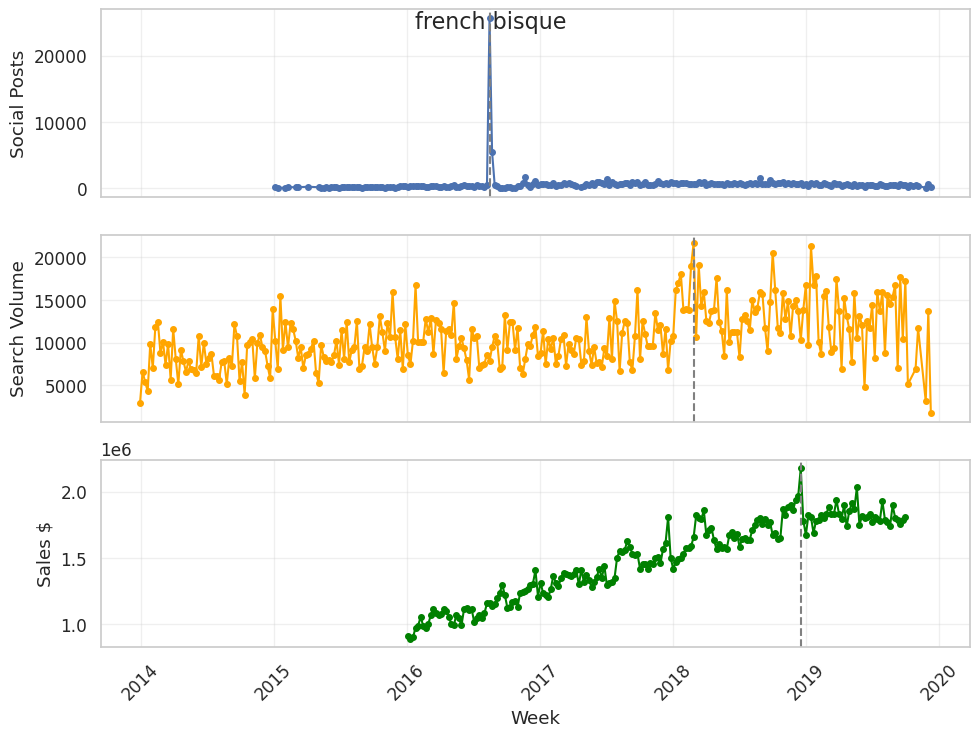

 Lags → Soc→Sea: 80w; Sea→Sal: 42w



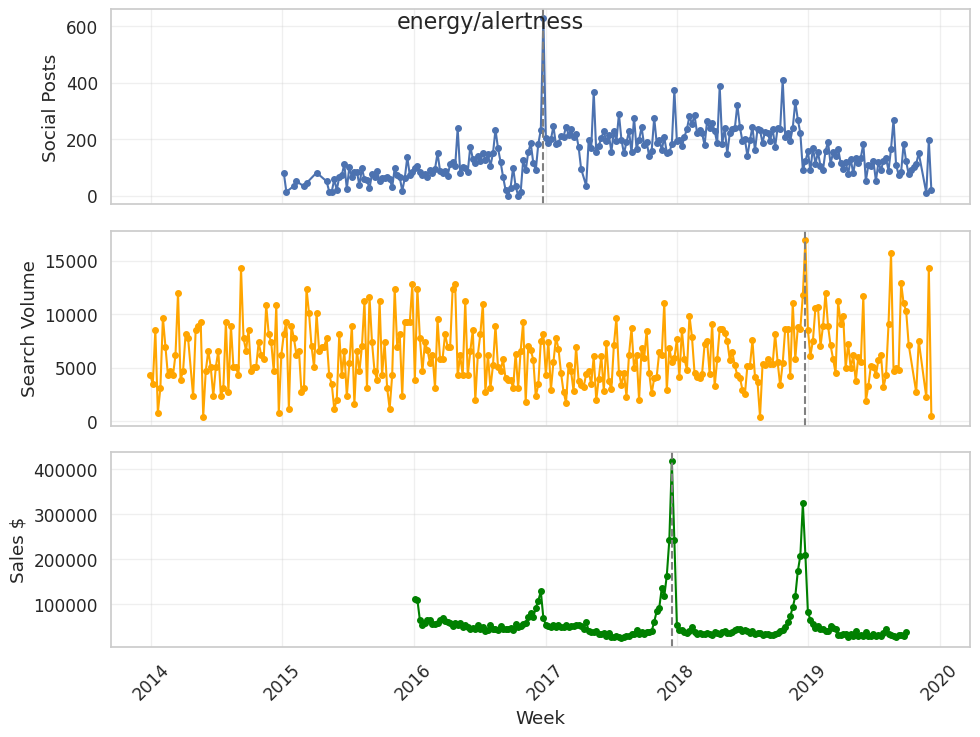

 Lags → Soc→Sea: 104w; Sea→Sal: -53w



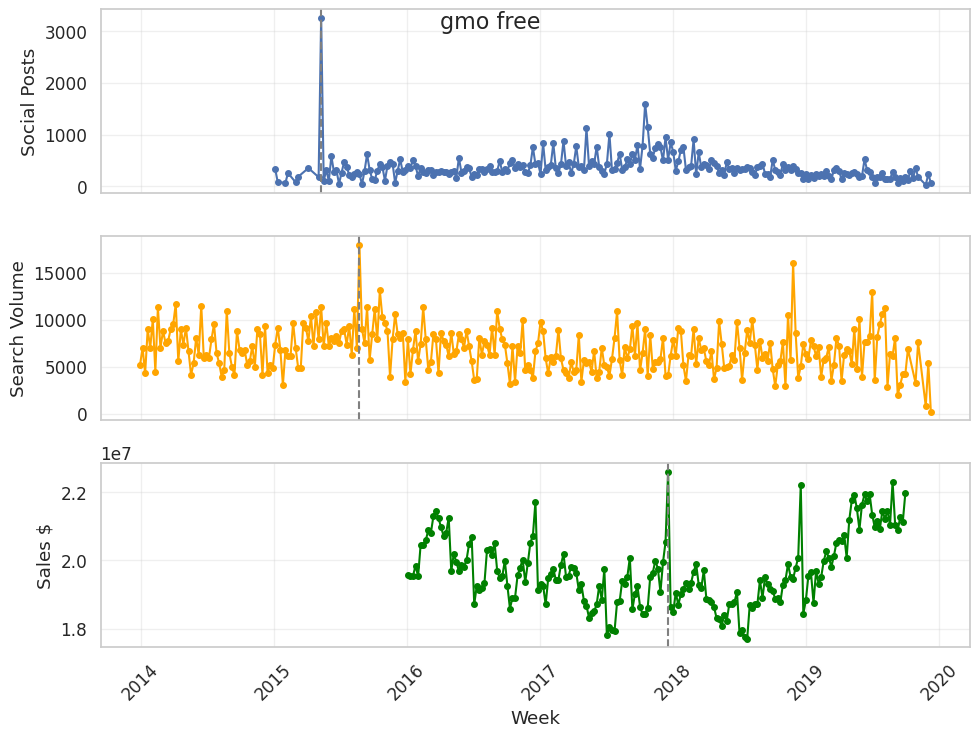

 Lags → Soc→Sea: 15w; Sea→Sal: 121w



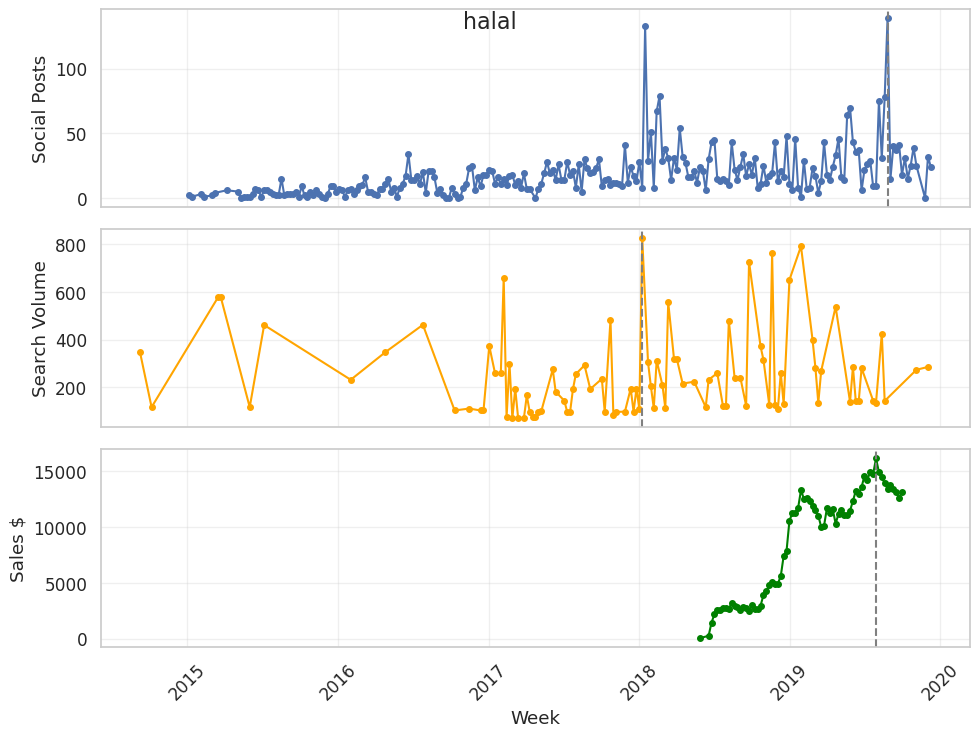

 Lags → Soc→Sea: -85w; Sea→Sal: 81w



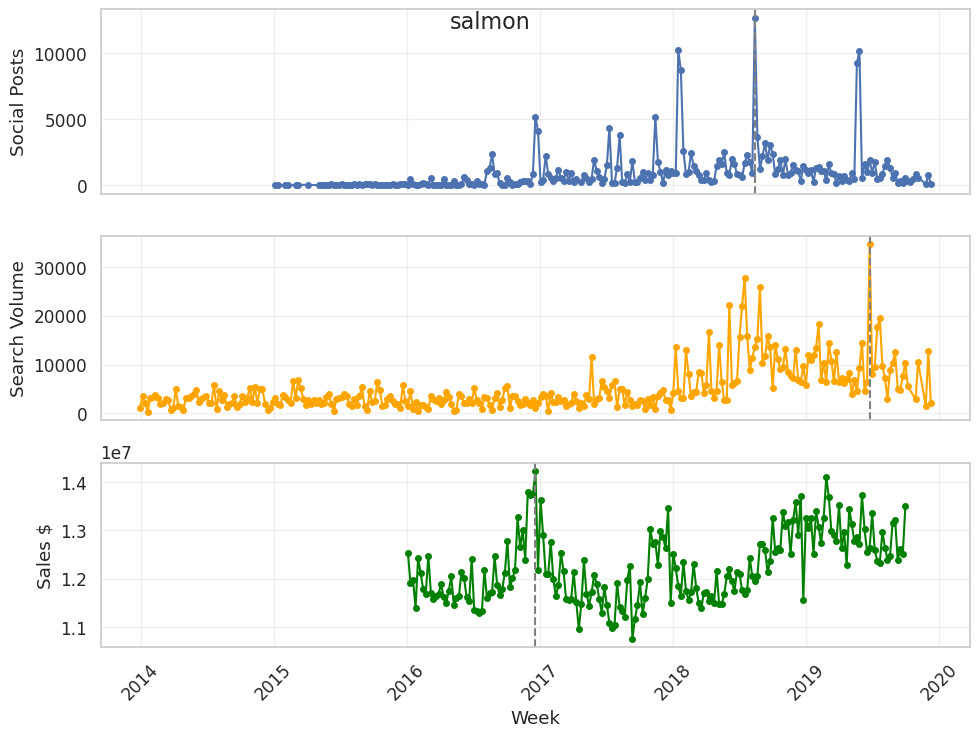

 Lags → Soc→Sea: 45w; Sea→Sal: -131w



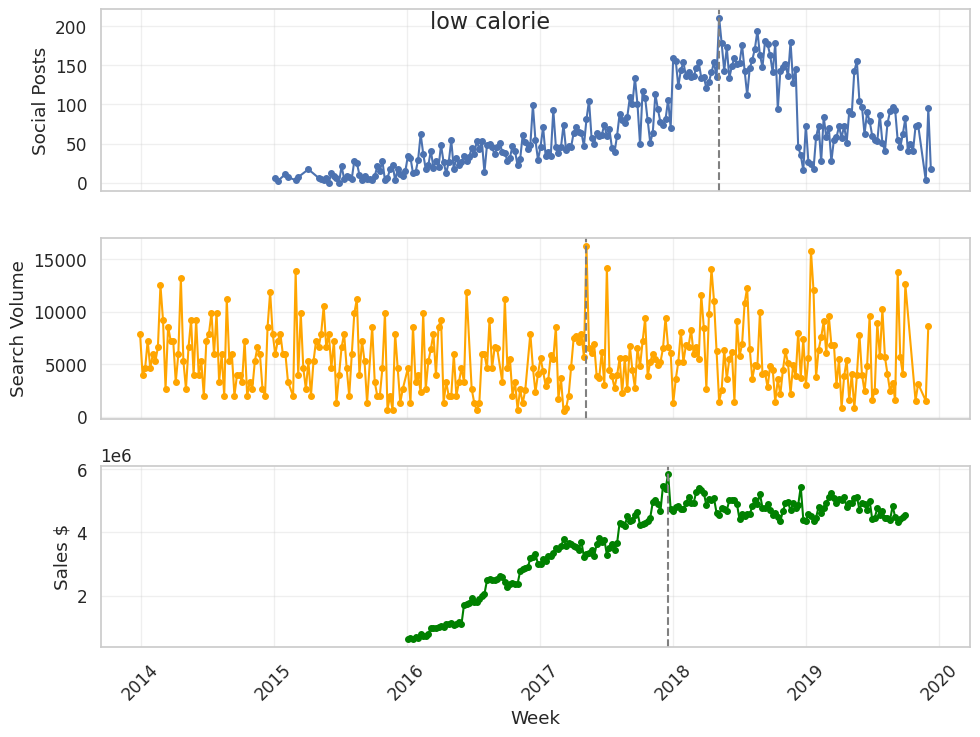

 Lags → Soc→Sea: -52w; Sea→Sal: 32w



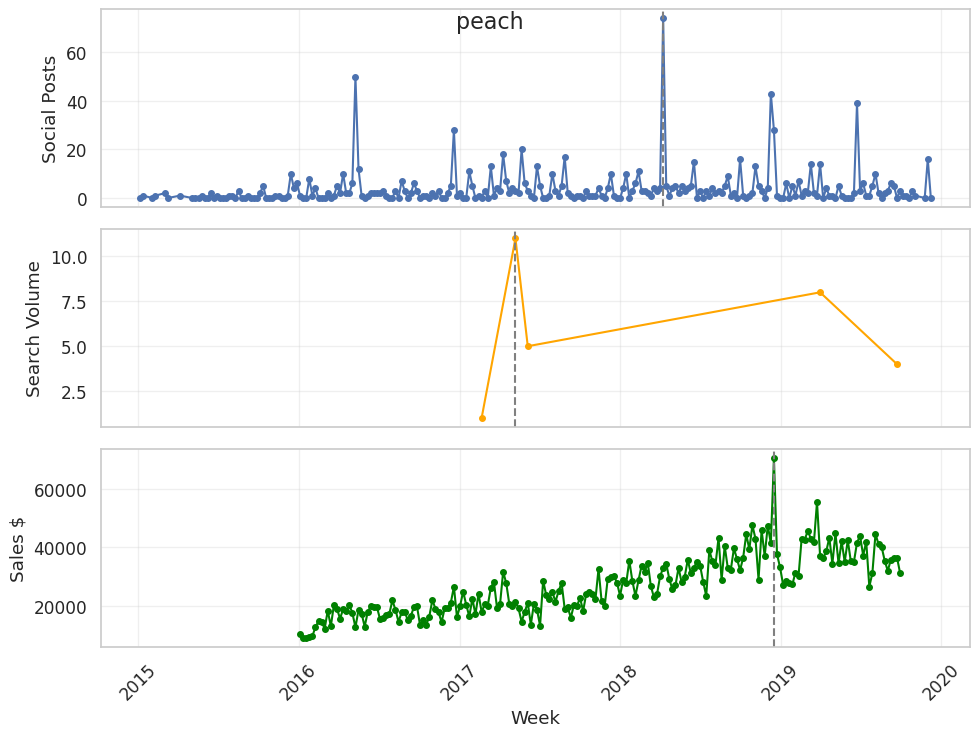

 Lags → Soc→Sea: -48w; Sea→Sal: 84w



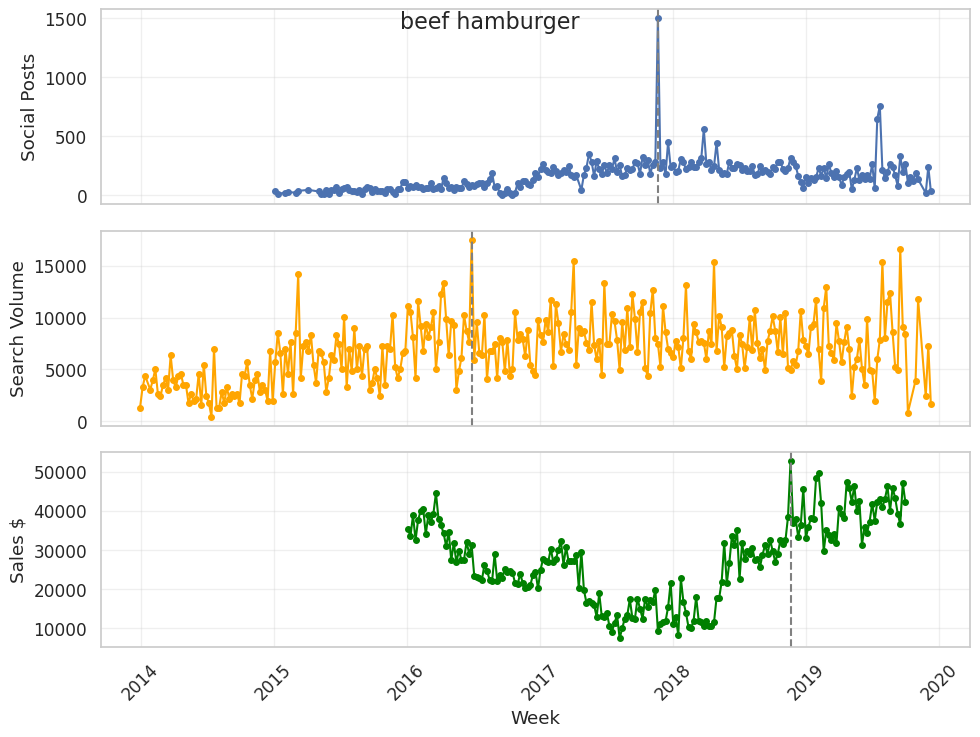

 Lags → Soc→Sea: -73w; Sea→Sal: 125w



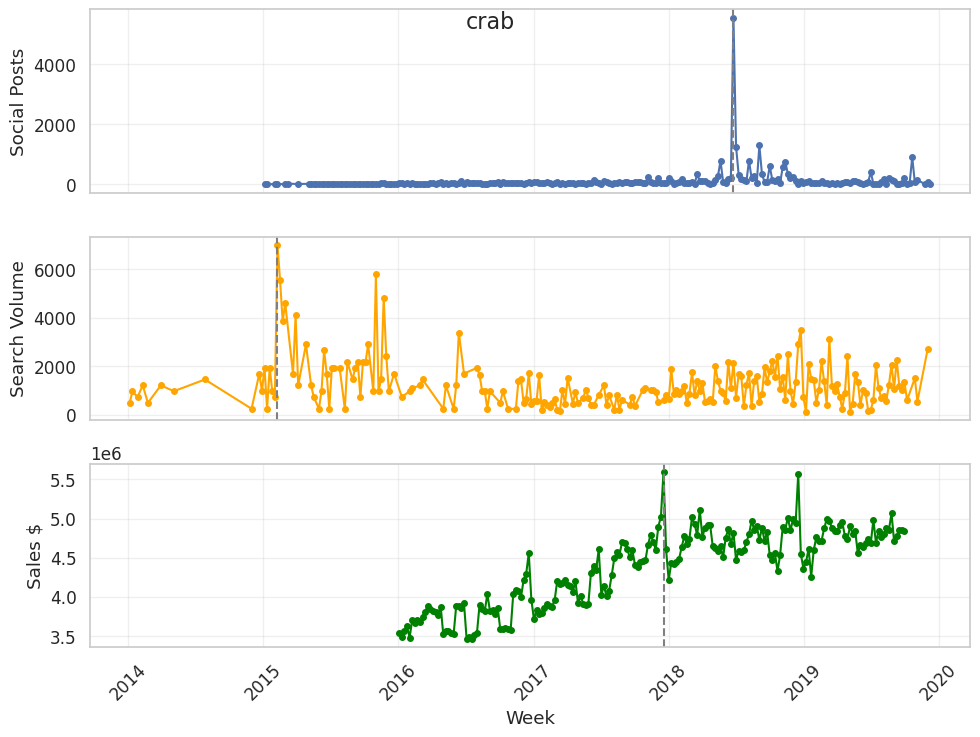

 Lags → Soc→Sea: -176w; Sea→Sal: 149w



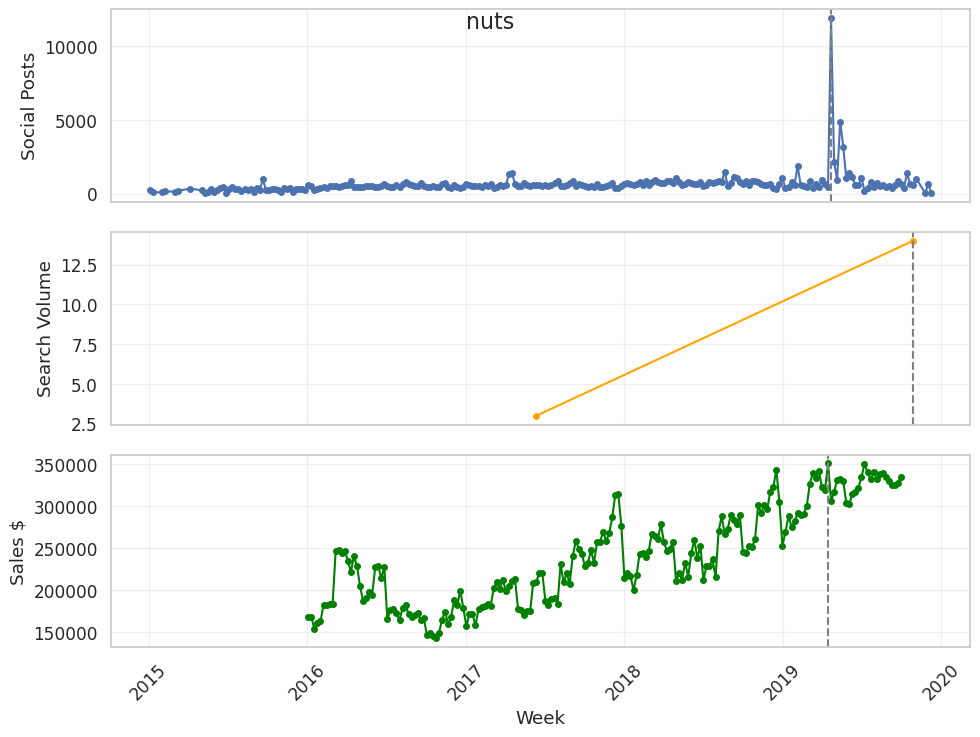

 Lags → Soc→Sea: 27w; Sea→Sal: -28w



: 

In [ ]:
# Example‐theme transitions ──
def plot_transition(cid):
    theme = theme_list_df.set_index('claim_id').loc[cid, 'theme_name']
    s = social_wk.query("claim_id==@cid").set_index('week')['social_posts']
    g = search_wk.query("claim_id==@cid").set_index('week')['search_volume']
    v = sales_wk.query("claim_id==@cid").set_index('week')['sales_dollars_value']
    sp, gp, ap = s.idxmax(), g.idxmax(), v.idxmax()

    fig, axes = plt.subplots(3,1,figsize=(10,8), sharex=True)
    fig.suptitle(theme, fontsize=16, y=0.92)

    axes[0].plot(s.index, s.values,    marker='o', ms=4); axes[0].axvline(sp, ls='--', color='gray')
    axes[0].set_ylabel('Social Posts')
    axes[1].plot(g.index, g.values,    marker='o', ms=4, color='orange'); axes[1].axvline(gp, ls='--', color='gray')
    axes[1].set_ylabel('Search Volume')
    axes[2].plot(v.index, v.values,    marker='o', ms=4, color='green');  axes[2].axvline(ap, ls='--', color='gray')
    axes[2].set_ylabel('Sales $'); axes[2].set_xlabel('Week')

    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
    print(f" Lags → Soc→Sea: {(gp-sp).days//7}w; Sea→Sal: {(ap-gp).days//7}w\n")

for cid in list(common)[20:30]:
    plot_transition(cid)